# Исследование объявлений о продаже квартир

<font size="4"><b>О проекте:</b></font>

Компания запрашивает установить параметры для определения рыночной стоимости объектов недвижимости для построения автоматизированной системы, отслеживающей аномалии и мошенническую деятельность. Анализ необходимо провести на основе данных сервиса Яндекс.Недвижимость по г. Санкт-Петербург (на основании архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет).


***Цель проекта:*** *выделить особенности, характерные для рынка недвижимости в г. Санкт-Петербург.*

***Задачи:***
1. *Провести исследовательский анализ данных*
2. *Определить факторы, наиболее влияющие на цену квартиры*


<font size="4"><b>Описание данных:</b></font>

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении



<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-датасете" data-toc-modified-id="Общая-информация-о-датасете-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о датасете</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поиск дубликатов</a></span><ul class="toc-item"><li><span><a href="#Неявные-дубликаты-в-названии-населенного-пункта" data-toc-modified-id="Неявные-дубликаты-в-названии-населенного-пункта-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Неявные дубликаты в названии населенного пункта</a></span></li><li><span><a href="#Поиск-записей-дубликатов" data-toc-modified-id="Поиск-записей-дубликатов-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Поиск записей-дубликатов</a></span></li></ul></li><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Работа с пропусками</a></span><ul class="toc-item"><li><span><a href="#Пропуски-в-категориальных-переменных:-is_apartment,-locality_name" data-toc-modified-id="Пропуски-в-категориальных-переменных:-is_apartment,-locality_name-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Пропуски в категориальных переменных: <code>is_apartment</code>, <code>locality_name</code></a></span></li><li><span><a href="#Пропуски-в-количественных-переменных" data-toc-modified-id="Пропуски-в-количественных-переменных-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Пропуски в количественных переменных</a></span></li></ul></li><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li><li><span><a href="#Очистка-от-аномалий" data-toc-modified-id="Очистка-от-аномалий-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Очистка от аномалий</a></span><ul class="toc-item"><li><span><a href="#Столбцы-без-аномалий:-total_images,-total_area,-first_day_exposition,-rooms,-balcony,-days_exposition" data-toc-modified-id="Столбцы-без-аномалий:-total_images,-total_area,-first_day_exposition,-rooms,-balcony,-days_exposition-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Столбцы без аномалий: <code>total_images</code>, <code>total_area</code>, <code>first_day_exposition</code>, <code>rooms</code>, <code>balcony</code>, <code>days_exposition</code></a></span></li><li><span><a href="#Столбец-last_price" data-toc-modified-id="Столбец-last_price-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Столбец <code>last_price</code></a></span></li><li><span><a href="#Столбец-ceiling_height" data-toc-modified-id="Столбец-ceiling_height-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Столбец <code>ceiling_height</code></a></span></li><li><span><a href="#Столбец-floors_total" data-toc-modified-id="Столбец-floors_total-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Столбец <code>floors_total</code></a></span></li><li><span><a href="#Столбцы-living_area-и-kitchen_area" data-toc-modified-id="Столбцы-living_area-и-kitchen_area-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Столбцы <code>living_area</code> и <code>kitchen_area</code></a></span></li><li><span><a href="#Столбец-floor" data-toc-modified-id="Столбец-floor-2.4.6"><span class="toc-item-num">2.4.6&nbsp;&nbsp;</span>Столбец <code>floor</code></a></span></li><li><span><a href="#Столбцы-с-картографическими-данными" data-toc-modified-id="Столбцы-с-картографическими-данными-2.4.7"><span class="toc-item-num">2.4.7&nbsp;&nbsp;</span>Столбцы с картографическими данными</a></span></li></ul></li></ul></li><li><span><a href="#Добавление-дополнительных-параметров" data-toc-modified-id="Добавление-дополнительных-параметров-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление дополнительных параметров</a></span><ul class="toc-item"><li><span><a href="#Цена-одного-квадратного-метра" data-toc-modified-id="Цена-одного-квадратного-метра-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Цена одного квадратного метра</a></span></li><li><span><a href="#День-недели-публикации-объявления" data-toc-modified-id="День-недели-публикации-объявления-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>День недели публикации объявления</a></span></li><li><span><a href="#Месяц-публикации-объявления" data-toc-modified-id="Месяц-публикации-объявления-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Месяц публикации объявления</a></span></li><li><span><a href="#Год-публикации-объявления" data-toc-modified-id="Год-публикации-объявления-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Год публикации объявления</a></span></li><li><span><a href="#Тип-этажа-квартиры" data-toc-modified-id="Тип-этажа-квартиры-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Тип этажа квартиры</a></span></li><li><span><a href="#Расстояние-до-центра-города-в-км" data-toc-modified-id="Расстояние-до-центра-города-в-км-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Расстояние до центра города в км</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общие-параметры-объектов" data-toc-modified-id="Общие-параметры-объектов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общие параметры объектов</a></span><ul class="toc-item"><li><span><a href="#Общая-площадь,-жилая-площадь-и-площадь-кухни" data-toc-modified-id="Общая-площадь,-жилая-площадь-и-площадь-кухни-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Общая площадь, жилая площадь и площадь кухни</a></span></li><li><span><a href="#Цена-объекта" data-toc-modified-id="Цена-объекта-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Цена объекта</a></span></li><li><span><a href="#Количество-комнат" data-toc-modified-id="Количество-комнат-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Количество комнат</a></span></li><li><span><a href="#Высота-потолков" data-toc-modified-id="Высота-потолков-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Высота потолков</a></span></li><li><span><a href="#Этаж-квартиры,-тип-этажа-квартиры,-этажность-зданий" data-toc-modified-id="Этаж-квартиры,-тип-этажа-квартиры,-этажность-зданий-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Этаж квартиры, тип этажа квартиры, этажность зданий</a></span></li><li><span><a href="#Расстояние-до-центра-города" data-toc-modified-id="Расстояние-до-центра-города-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Расстояние до центра города</a></span></li><li><span><a href="#Расстояние-до-ближайшего-аэропорта" data-toc-modified-id="Расстояние-до-ближайшего-аэропорта-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Расстояние до ближайшего аэропорта</a></span></li><li><span><a href="#Расстояние-до-ближайшего-парка" data-toc-modified-id="Расстояние-до-ближайшего-парка-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span>Расстояние до ближайшего парка</a></span></li><li><span><a href="#День-и-месяц-публикации-объявления" data-toc-modified-id="День-и-месяц-публикации-объявления-4.1.9"><span class="toc-item-num">4.1.9&nbsp;&nbsp;</span>День и месяц публикации объявления</a></span></li></ul></li><li><span><a href="#Скорость-продажи-квартир" data-toc-modified-id="Скорость-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Скорость продажи квартир</a></span></li><li><span><a href="#Факторы,-наиболее-влияющие-на-цену-квартиры" data-toc-modified-id="Факторы,-наиболее-влияющие-на-цену-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы, наиболее влияющие на цену квартиры</a></span><ul class="toc-item"><li><span><a href="#Зависимость-от--площади" data-toc-modified-id="Зависимость-от--площади-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Зависимость от  площади</a></span></li><li><span><a href="#Зависимость-от-количества-комнат" data-toc-modified-id="Зависимость-от-количества-комнат-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Зависимость от количества комнат</a></span></li><li><span><a href="#Зависимость-от-типа-этажа" data-toc-modified-id="Зависимость-от-типа-этажа-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Зависимость от типа этажа</a></span></li><li><span><a href="#Зависимость-от-даты-размещения" data-toc-modified-id="Зависимость-от-даты-размещения-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Зависимость от даты размещения</a></span></li></ul></li><li><span><a href="#Средняя-цена-одного-квадратного-метра" data-toc-modified-id="Средняя-цена-одного-квадратного-метра-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Средняя цена одного квадратного метра</a></span></li><li><span><a href="#Влияние-расстояния-до-центра-на-цену-квадратного-метра-квартир-Санкт-Петербурга" data-toc-modified-id="Влияние-расстояния-до-центра-на-цену-квадратного-метра-квартир-Санкт-Петербурга-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Влияние расстояния до центра на цену квадратного метра квартир Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

### Общая информация о датасете

In [1]:
# загрузка библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# загрузка данных
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data = data.rename(columns={
    'cityCenters_nearest' : 'center_nearest' # к одному стилю
})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

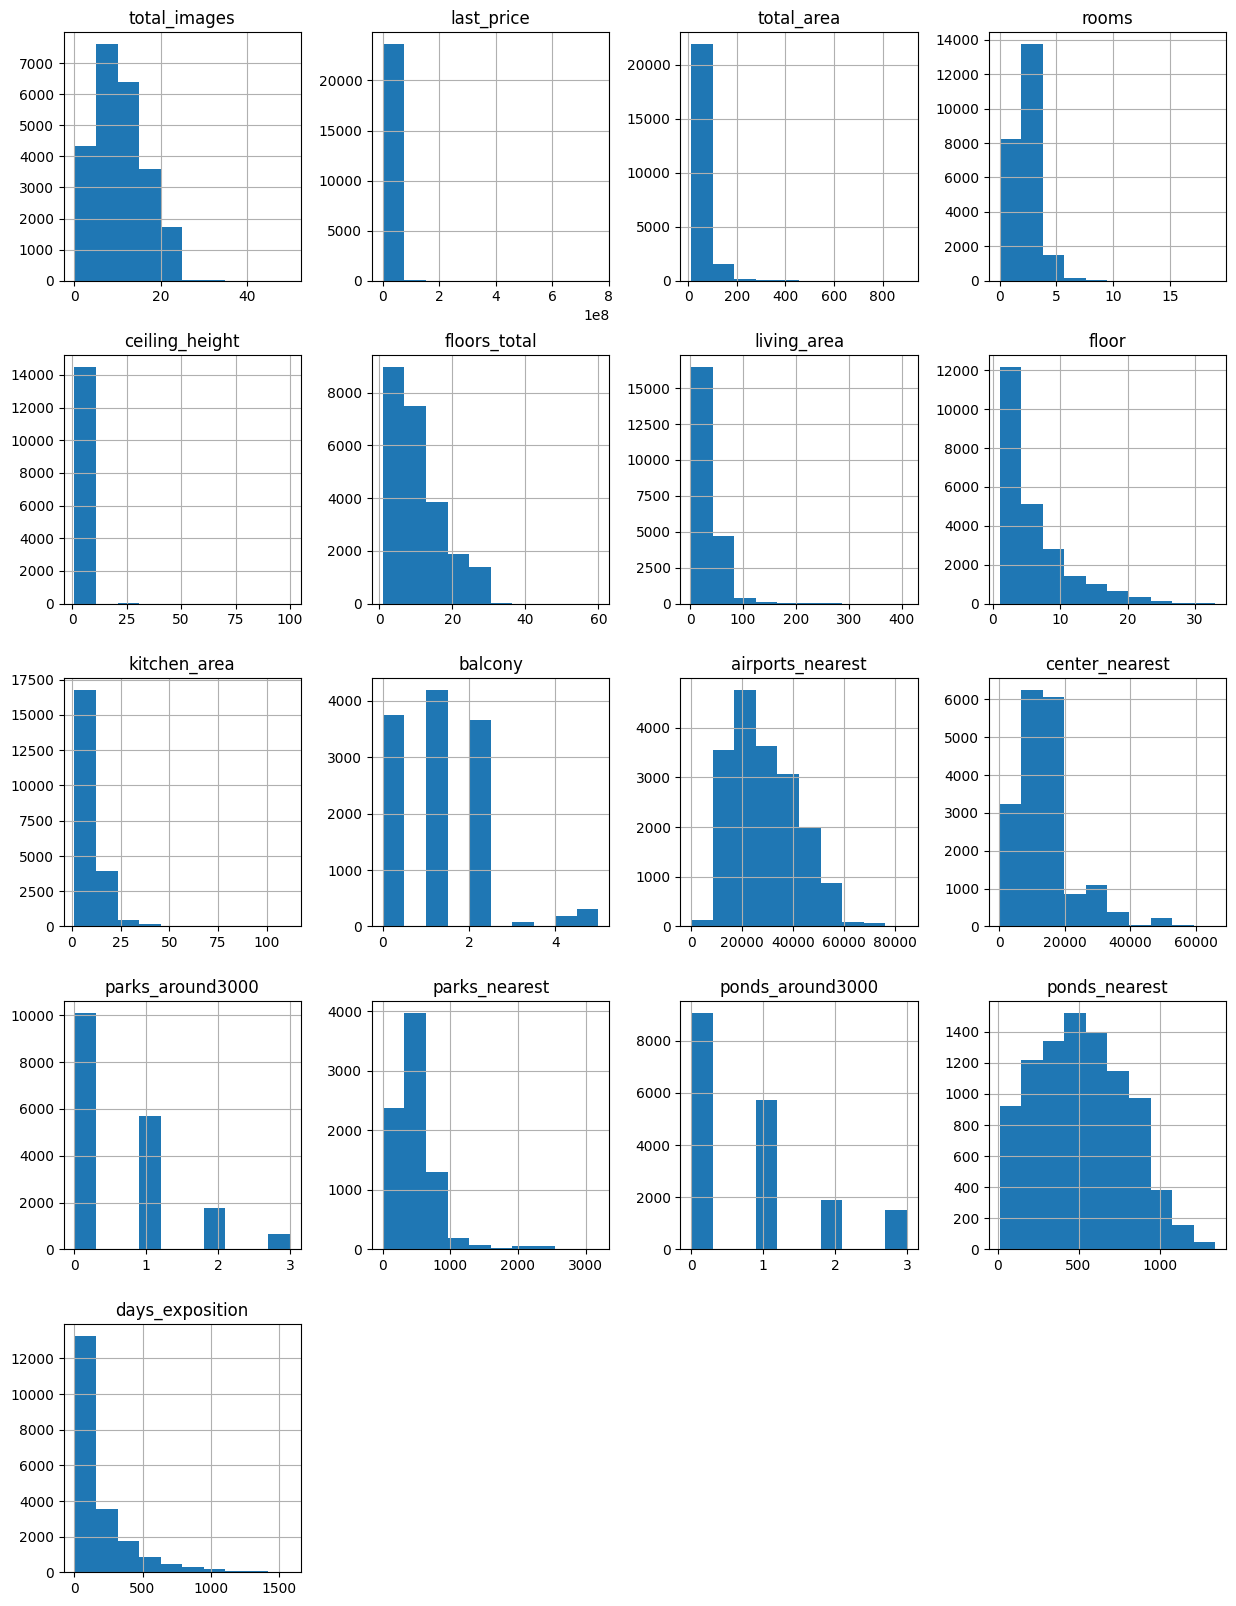

In [5]:
data.hist(figsize=(15, 20));

Большинство гистограмм отличаются от нормального распределения, за исключением, может быть, распределения расстояния до ближайшего водоёма. Столбец с количеством дней экспозиции имеет распределение, похожее на пуассоновское, что согласуется с ожидаемым для временной зависимости распределением.

### Предобработка данных

#### Поиск дубликатов

##### Неявные дубликаты в названии населенного пункта

In [6]:
# получим список населенных пунктов в датасете
print('Всего населенных пунктов:', len(data['locality_name'].unique()))
data['locality_name'].unique()

Всего населенных пунктов: 365


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В полученном списке присутствуют неявные дупликаты, например "Деревня Кудрово" и "Кудрово". **Избавимся от слов, описывающих статус населенного пункта, оставим только название.**

In [7]:
# функция, очищающая имена населенных пунктов
def locality_rename(row):
    try:
        if 'Вещев' in row:
            return 'Вещево'
        elif 'Привет' in row:
            return 'Приветнинское'
        elif 'Лесная' in row:
            return 'Лесная Поляна'
        elif 'Жилпосёлок' in row:
            return 'Жилпосёлок'
        elif 'деревня' in row:
            return row.replace('деревня ', '')
        elif 'городской посёлок' in row:
            return row.replace('городской посёлок ', '')
        elif 'посёлок станции' in row:
            return row.replace('посёлок станции ', '')
        elif 'посёлок городского типа' in row:
            return row.replace('посёлок городского типа ', '')
        elif 'коттеджный посёлок' in row:
            return row.replace('коттеджный посёлок ', '')
        elif 'посёлок' in row:
            return row.replace('посёлок ', '')
        elif 'городской поселок' in row:
            return row.replace('городской поселок ', '')
        elif 'поселок городского типа' in row:
            return row.replace('поселок городского типа ', '')
        elif 'коттеджный поселок' in row:
            return row.replace('коттеджный поселок ', '')
        elif 'поселок станции' in row:
            return row.replace('поселок станции ', '')
        elif 'поселок' in row:
            return row.replace('поселок ', '')
        elif 'село' in row:
            return row.replace('село ', '')
        elif 'садовое товарищество' in row:
            return row.replace('садовое товарищество ', '')
        elif 'станции' in row:
            return row.replace('станции ', '')
        else:
            return row
    except:
        return row

In [8]:
data['locality_name'] = data['locality_name'].apply(locality_rename)

print('Всего населенных пунктов:', len(data['locality_name'].unique())) # посмотрим изменения в количестве
data['locality_name'].unique()

Всего населенных пунктов: 306


array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [9]:
# check
data.locality_name.nunique()

305

Населенных пунктов стало на 61 меньше, датасет очищен от неявных дупликатов.

##### Поиск записей-дубликатов

In [10]:
# напишем функцию, ищущую дупликаты в датасете по
# общей площади, количестве этажей, этаже, жилой площади, расстоянию до центра, названию населенного пункта, кол-ву комнат
def dupl_search(data):
    data_search = data.loc[:, ['total_area',
    'floor',
    'living_area',
    'floors_total',
    'center_nearest',
    'rooms',
    'locality_name']]
    data_search = data_search[data_search.duplicated()]
    return data_search, len(data_search)

In [11]:
print('В датасете было найдено', dupl_search(data)[1], 'дубликата/ов')

В датасете было найдено 63 дубликата/ов


In [12]:
# взглянем на дупликаты
dupl_search(data)[0].head(10)

,total_area,floor,living_area,floors_total,center_nearest,rooms,locality_name
1376,42.0,3,29.0,5.0,NaN,2,Выборг
3576,57.1,8,39.0,9.0,11347.0,3,Санкт-Петербург
6611,43.0,3,17.0,5.0,NaN,1,Низино
6929,122.7,4,45.9,19.0,4341.0,3,Санкт-Петербург
8099,112.6,2,68.7,5.0,3712.0,3,Санкт-Петербург
8364,31.0,5,17.5,5.0,NaN,1,Выборг
9282,33.0,2,18.0,5.0,NaN,1,Сертолово
9695,63.0,2,NaN,9.0,NaN,3,Кингисепп
9790,54.0,5,30.0,5.0,NaN,2,Горбунки
9886,42.5,7,19.8,18.0,NaN,1,Никольское


Возможно, это были повторные размещения одних и тех же квартир. Удалим эти дупликаты из датасета.

In [13]:
# удалим дупликаты
for i in dupl_search(data)[0].index:
    data = data[data.index != i]

In [14]:
# проверим, сколько дупликатов осталось
print('В датасете было найдено', dupl_search(data)[1], 'дубликата/ов')

В датасете было найдено 0 дубликата/ов


#### Работа с пропусками

In [15]:
# определим количество пропущенных значений в данных
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9168
floors_total               86
living_area              1895
floor                       0
is_apartment            20871
studio                      0
open_plan                   0
kitchen_area             2270
balcony                 11488
locality_name              48
airports_nearest         5504
center_nearest           5481
parks_around3000         5480
parks_nearest           15570
ponds_around3000         5480
ponds_nearest           14542
days_exposition          3165
dtype: int64

Пропущенные значения есть в 14 столбцах.

##### Пропуски в категориальных переменных: `is_apartment`, `locality_name`

In [16]:
# проверим, какие данные хранит столбец is_apartment
data['is_apartment'].value_counts(dropna=False)

NaN      20871
False     2715
True        50
Name: is_apartment, dtype: int64

Пропущенные значения занимают бо́льшую часть данных, поэтому строки с этими значениями удалять нельзя. Можно предположить, что такое большое количество пропусков связано с ошибками при выгрузке данных, и уточнить у программистов, можно ли это проверить. 

**Однако предположим, что квартиры, у которых этот параметр опущен, *не являются апартаментами*.**

In [17]:
# заменим пропущенные значения в столбце 'is_apartment' на False

data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].value_counts(dropna=False) # проверим успешность замены

False    23586
True        50
Name: is_apartment, dtype: int64

In [18]:
# проверим, какие данные содержатся в столбце 'locality_name'
data['locality_name'].value_counts(dropna=False)

Санкт-Петербург    15698
Мурино               587
Кудрово              470
Шушары               440
Всеволожск           398
                   ...  
Цвылёво                1
Чудской Бор            1
Большое Рейзино        1
Новая Ропша            1
Борисова Грива         1
Name: locality_name, Length: 306, dtype: int64

In [19]:
# найдём долю, приходящуюся на пропущенные значения
print('Доля пропущенных значений:', data['locality_name'].isna().sum() / len(data['locality_name']))

Доля пропущенных значений: 0.002030800473853444


Доля пропущенных значений в этом столбце составляет менее половины процента. Вероятно, эти данные пропущены также из-за ошибок при выгрузке данных. Тем не менее, в таблице не присутствуют данные, на основе которых можно было бы сделать логически обоснованную замену пропущенных значений: нельзя угадать, к какому населенному пункту относится квартира, если нет её координат. Но пока не будем удалять эти данные.

**Заменим пропуски в столбце `locality_name` на "Не указано".**

In [20]:
# удалим из таблицы строки, в которых информация о населенном пункте отсутствует
data['locality_name'].fillna('Не указано', inplace=True)
print('Количество пропущенных значений:', data['locality_name'].isna().sum())

Количество пропущенных значений: 0


##### Пропуски в количественных переменных

Рассмотрим столбцы отдельно.

* ***Начнём с `balcony`:***

In [21]:
# проверим, какие данные содержатся в столбце 'balcony'
data['balcony'].value_counts(dropna=False)

NaN    11488
1.0     4182
0.0     3749
2.0     3654
5.0      301
4.0      181
3.0       81
Name: balcony, dtype: int64

Можно предположить, что количество балконов в квартире не было указано в связи с их отсутствием.
**Заменим пропущенные значения на 0.**

In [22]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].value_counts(dropna=False)

0.0    15237
1.0     4182
2.0     3654
5.0      301
4.0      181
3.0       81
Name: balcony, dtype: int64

* ***Пропуски в столбцах `airports_nearest`, `center_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000` и `ponds_nearest` рассмотрим параллельно.***

Во всех этих столбцах указаны данные *о расстоянии* от квартиры до ближайших особых мест. Так же, как и с населенным пунктом, мы не можем точно заполнить пропущенные значения без координат. Однако, чтобы не отбрасывать эти данные, их можно заменить некоторым средним значением.

Искать общее среднее по одному параметру для всего датасета неккоректно. Так, расстояние до аэропорта для квартир внутри отдельного посёлка не сильно будут отличаться между собой, в отличие от квартир из населенных пунктов, расположенных по разные стороны от Санкт-Петербурга. Или, например, расстояние в спальном районе Петербурга до ближайшего крупного парка может составлять в среднем 1 км, тогда как в Пушкине будет достаточно пройти 300 метров. Проиллюстрируем это на последнем предположении.

In [23]:
# посмотрим, присутствует ли зависимость между расстоянием до ближайшего парка и населенным пунктом
(
    data
    .dropna(subset=['parks_nearest']) #исключим из рассмотрения пропущенные значения
    .pivot_table(index='locality_name', values='parks_nearest', aggfunc=('mean', 'median', 'std'))
    .sort_values(by='median')
)

,mean,median,std
locality_name,,,
Зеленогорск,210.625000,147.5,193.336279
Кронштадт,324.574713,293.0,174.827133
Петергоф,419.559441,294.0,411.389994
Павловск,379.538462,312.0,190.872781
Сестрорецк,409.583333,367.0,223.429275
Колпино,495.481203,393.0,420.034046
Пушкин,404.297170,399.5,212.397623
Ломоносов,389.062500,407.0,162.598265
Красное Село,466.086957,428.5,215.565285


На данном этапе предположение в целом подтверждается: в Пушкине до парков ближе, чем в Санкт-Петербурге, но в среднем ближе всего до парка жителям Зеленогорска. Аналогичное поведение можно ожидать и для расстояний до водоёмов.

Кроме того, значения посчитаны только для 13 населенных пунктов, тогда как в датасете их представлено 306. Отсутствие расстояний до ближайшего парка у такого большого количества населенных пунктов вызывает вопросы. Возможно, возникают проблемы при расчете расстояний до ближайших парков / водоёмов для населенных пунктов, расположенных на некотором критичном расстоянии от Санкт-Петербурга. 

Можно отметить, что для некоторых населенных пунктов медианная оценка и среднее арифметическое существенно разделяются, что говорит о сильном разбросе значений, это подтверждается и большими значениями стандартного отклонения. В первой части проекта были представлены гистограммы и было отмечено, что распределения отличаются от нормальных, поэтому, чтобы на этом этапе сильный разброс не искажал последующие вычисления, воспользуемся именно *медианной оценкой*. При этом зависимость этих расстояний от цены квартиры уже внутри населенного пункта учитывать не будем, чтобы не повлиять на дальнейшие результаты.

Перед заполнением пропусков отметим также одну любопытную закономерность. **Большинство пропусков внутри этих столбцов сгруппированы**, то есть там, где пропущены расстояния до аэропорта, там же пропущены и расстояния до парков и водоёмов:

In [24]:
data[data['airports_nearest'].isna()].isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          2557
floors_total              10
living_area              618
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             710
balcony                    0
locality_name              0
airports_nearest        5504
center_nearest          5480
parks_around3000        5480
parks_nearest           5484
ponds_around3000        5480
ponds_nearest           5496
days_exposition          856
dtype: int64

In [25]:
print(f'Доля данных с пропусками в столбце "airports_nearest" от всего датасета: \
{data["airports_nearest"].isna().sum() / len(data):.0%}')

Доля данных с пропусками в столбце "airports_nearest" от всего датасета: 23%


Если сравнить эту таблицу с такой же таблицей для всего датасета, то станет ясно, что отдельно пропуски в столбцах `airports_nearest`, `center_nearest`, `parks_around3000` и `ponds_around3000` практически не встречаются. Можно предположить, что для некоторой группы квартир, составляющей более **20%** от всех данных, были утеряны картографические данные, об этом необходимо сообщить программистам.

Важно отметить, что пропуски в `parks_around3000` и `ponds_around3000` можно объяснить отсутствием парков / водоёмов на расстоянии до 3000 м от квартиры. Проверим, насколько это реалистично в случае с рассматриваемыми населенными пунктами, на основе имеющихся данных.

In [26]:
# разделим количество квартир с отсутствием парков рядом на 
# общее количество квартир, за вычетом квартир с пропуском в столбце "parks_around3000"

print(f'Доля квартир, для которых до ближайшего парка более 3 км: \
{data[data["parks_around3000"] == 0]["parks_around3000"].count() / len(data.dropna(subset=["parks_around3000"])) :.0%}')

# аналогично для водоёмов

print(f'Доля квартир, для которых до ближайшего водоёма более 3 км: \
{data[data["ponds_around3000"] == 0]["ponds_around3000"].count() / len(data.dropna(subset=["ponds_around3000"])) :.0%}')

Доля квартир, для которых до ближайшего парка более 3 км: 56%
Доля квартир, для которых до ближайшего водоёма более 3 км: 50%


Но может ли быть такое, что в `parks_around3000` сказано, что парков рядом нет, а в `parks_nearest` указано расстояние меньшее, чем 3 км?

In [27]:
# найдём квартиры, в которых данные столбца "parks_around3000" не соответствуют данным "parks_nearest"
print('Количество несовпадений в парках:', 
      data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'] <= 3000), 'parks_nearest'].count())

# аналогично для водоёмов
print('Количество несовпадений в водоёмах:', 
      data.loc[(data['ponds_around3000'] == 0) & (data['ponds_nearest'] <= 3000), 'ponds_nearest'].count())

Количество несовпадений в парках: 0
Количество несовпадений в водоёмах: 0


Похоже, что информация о том, что для более чем половины рассматриваемых квартир расстояние до парков и / или водоёмов превышает 3 км, достоверна.

Проверим теперь наоборот наличие случаев, когда значение в `parks_nearest` больше 3 км, а в `parks_around3000` - не ноль, и аналогично для водоёмов.

In [28]:
# найдём квартиры, в которых данные столбца "parks_around3000" не соответствуют данным "parks_nearest"
print('Количество несовпадений в парках:', 
      data.loc[(data['parks_around3000'] != 0) & (data['parks_nearest'] > 3000), 'parks_nearest'].count())

# аналогично для водоёмов
print('Количество несовпадений в водоёмах:', 
      data.loc[(data['ponds_around3000'] != 0) & (data['ponds_nearest'] > 3000), 'ponds_nearest'].count())

Количество несовпадений в парках: 0
Количество несовпадений в водоёмах: 0


Посмотрим, есть ли квартиры с пропусками в `parks_around3000`, но заполненными данными в `parks_nearest`.

In [29]:
# найдём квартиры, в которых пропуски в столбце "parks_around3000", но заполнено "parks_nearest"
print('Количество несовпадений в парках:', 
      data.loc[(data['parks_around3000'].isna()) & (~data['parks_nearest'].isna()), 'parks_nearest'].count())

# аналогично для водоёмов
print('Количество несовпадений в водоёмах:', 
      data.loc[(data['ponds_around3000'].isna()) & (~data['ponds_nearest'].isna()), 'ponds_nearest'].count())

Количество несовпадений в парках: 0
Количество несовпадений в водоёмах: 0


Ещё больше пропусков встречается в `parks_nearest` и `ponds_nearest`, хоть и часть этих пропусков также сгруппирована с пропусками в остальных картографических данных.

In [30]:
print(f'Доля данных с пропусками в столбце "parks_nearest" от всего датасета: \
{data["parks_nearest"].isna().sum() / len(data):.0%}')
print(f'Доля данных с пропусками в столбце "ponds_nearest" от всего датасета: \
{data["ponds_nearest"].isna().sum() / len(data):.0%}')

Доля данных с пропусками в столбце "parks_nearest" от всего датасета: 66%
Доля данных с пропусками в столбце "ponds_nearest" от всего датасета: 62%


Так как это тоже относится к картографическим данным (а не данным, внесённым самим пользователем), то такое количество пропусков может говорить о наличии проблем в программах, рассчитывающих расстояние от квартиры до ближайших парков / водоёмов. Например, если это расстояние больше некоторого критического зачения.

Другая причина, как отмечалось выше, может состоять в неккоректной идентификации программами водоёмов и парков для населенных пунктов, отдаленных от Санкт-Петербурга. Как пример, рассмотрим данные о посёлке Красная Долина.

In [31]:
data.loc[(data['locality_name'] == 'Красная Долина'), ['ponds_nearest', 'ponds_around3000']]

,ponds_nearest,ponds_around3000
5775,NaN,NaN
20048,NaN,NaN
20151,NaN,NaN


Информация о водоёмах для квартир в Красной Долине отсутствует, однако в посёлке есть пляж у Пионерского озера, расстояние до которого от дальнего края посёлка находится в пределах 3 км.

Посмотрим, есть ли квартиры с пропусками в `parks_nearest`, но заполненными данными в `parks_around3000`.

In [32]:
# найдём квартиры, в которых пропуски в столбце "parks_around3000", но заполнено "parks_nearest"
print('Количество несовпадений в парках:', 
      data.loc[(~data['parks_around3000'].isna()) & (data['parks_nearest'].isna()), 'parks_around3000'].count())

# аналогично для водоёмов
print('Количество несовпадений в водоёмах:', 
      data.loc[(~data['ponds_around3000'].isna()) & (data['ponds_nearest'].isna()), 'ponds_around3000'].count())

Количество несовпадений в парках: 10090
Количество несовпадений в водоёмах: 9062


Значения в столбцах `parks_nearest` и `ponds_nearest` для этого случая можно было бы заполнить каким-либо специальным значением, говорящим по крайней мере о том, что ближайший парк до 3км или дальше. Однако сами столбцы `parks_around3000` и `ponds_around3000` отвечают на этот вопрос, поэтому дополнительно заполнять эти пропуски условным ключом нет смысла.

Но важно при заполнении данных в столбцах о ближайшем расстоянии медианным значением учесть показания столбца о том, что есть в радиусе 3 км.

**Заполним пропуски в столбцах `airports_nearest`, `center_nearest`, `parks_nearest`, `ponds_nearest` медианным значением для каждого населенного пункта в отдельности.**

In [33]:
# проверим, что замену можно произвести корректно
data[data['airports_nearest'].isna()]['locality_name'].value_counts()

Мурино                585
Кудрово               470
Всеволожск            398
Гатчина               306
Выборг                230
                     ... 
Большая Пустомержа      1
Куровицы                1
Терпилицы               1
Кирпичное               1
Счастье                 1
Name: locality_name, Length: 287, dtype: int64

In [34]:
# посмотрим информацию о квартирах, выставленных в посёлке Иссад
data[data['locality_name'] == 'Иссад']['airports_nearest']

1451   NaN
Name: airports_nearest, dtype: float64

В датасете присутствует информация только об одной квартире из посёлка Иссад. Это значит, что посчитать медианное значение для этого посёлка, чтобы заполнить пропуск, не представляется возможным. **Подобные пропуски заполнять не будем.**

In [35]:
# ещё раз выведем количество пропусков в столбцах 'airports_nearest', 'center_nearest', 'parks_nearest', 'ponds_nearest'
for column in ['airports_nearest', 'center_nearest', 'parks_nearest', 'ponds_nearest']:
    print(f'Количество пропусков в столбце {column}:', data[column].isna().sum())

Количество пропусков в столбце airports_nearest: 5504
Количество пропусков в столбце center_nearest: 5481
Количество пропусков в столбце parks_nearest: 15570
Количество пропусков в столбце ponds_nearest: 14542


In [36]:
# заполним пропуски в четырех столбцах медианным значением там, где это возможно
for column in ['airports_nearest', 'center_nearest', 'parks_nearest', 'ponds_nearest']:
    
    for cat in data['locality_name'].unique():
        # проверим наличие данных для подсчета медианы
        if len(data.loc[(data['locality_name'] == cat) & (~data[column].isna()), column]) != 0:
            
            data.loc[(data['locality_name'] == cat) & (data[column].isna()), column] = \
            data.loc[(data['locality_name'] == cat), column].median()

In [37]:
for column in ['airports_nearest', 'center_nearest', 'parks_nearest', 'ponds_nearest']:
    print(f'Количество оставшихся пропусков в столбце {column}:', data[column].isna().sum())

Количество оставшихся пропусков в столбце airports_nearest: 4794
Количество оставшихся пропусков в столбце center_nearest: 4794
Количество оставшихся пропусков в столбце parks_nearest: 5960
Количество оставшихся пропусков в столбце ponds_nearest: 4903


Проведем повторную проверку для столбцов `parks_around3000` и `ponds_around3000`:

In [38]:
# найдём квартиры с пустыми значениями в "parks_around3000" и новыми данными в "parks_nearest"

mismatch_parks_count = data.loc[(data['parks_around3000'].isna()) & (data['parks_nearest'] <= 3000), 'parks_nearest'].count()
mismatch_ponds_count = data.loc[(data['ponds_around3000'].isna()) & (data['ponds_nearest'] <= 3000), 'ponds_nearest'].count()

print('Количество несовпадений в парках:', 
      mismatch_parks_count,
      f'({mismatch_parks_count / len(data) :.2%})')

# аналогично для водоёмов
print('Количество несовпадений в водоёмах:', 
      mismatch_ponds_count,
      f'({mismatch_ponds_count / len(data) :.2%})')

del mismatch_ponds_count
del mismatch_parks_count

Количество несовпадений в парках: 74 (0.31%)
Количество несовпадений в водоёмах: 663 (2.81%)


In [39]:
# найдём квартиры, в которых данные столбца "parks_around3000" не соответствуют данным "parks_nearest"
print('Количество несовпадений в парках:', 
      data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'] <= 3000), 'parks_nearest'].count(),
      f'({data.loc[(data["parks_around3000"] == 0) & (data["parks_nearest"] <= 3000), "parks_nearest"].count() / len(data) :.2%})')

# аналогично для водоёмов
print('Количество несовпадений в водоёмах:', 
      data.loc[(data['ponds_around3000'] == 0) & (data['ponds_nearest'] <= 3000), 'ponds_nearest'].count(),
      f'({data.loc[(data["ponds_around3000"] == 0) & (data["ponds_nearest"] <= 3000), "ponds_nearest"].count() / len(data) :.2%})')

Количество несовпадений в парках: 9536 (40.35%)
Количество несовпадений в водоёмах: 8976 (37.98%)


Как видно, теперь данные внутри одной квартиры не совпадают друг с другом.

В первом случае, при рассмотрении пустых значений в столбцах `parks_around3000` и `ponds_around3000`, доля несовпадений от всего датасета невелика. Однако медианные значения в `parks_nearest` и `ponds_nearest` указывают только на примерное расстояние до ближайшего парка, а не на количество парков рядом: таких "пропущенных" парков может быть и 2, и 3, и более. **Чтобы отметить, что для таких квартир в радиусе 3 км находится неизвестное, но не нулевое количество парков / водоёмов, заменим пропуски специальным значением, например, на -3**.

Во втором случае доля несовпадений занимает уже значительную часть датасета. Будем считать, что исходные нулевые значения в столбцах `parks_around3000` и `ponds_around3000` верны, в таком случае ближайший парк / водоём должен находится на расстоянии более 3 км. Проведем повторную замену значений в столбцах `parks_nearest` и `ponds_nearest` для таких квартир, заменив их обратно на пустые значения. К сожалению, объективную и не сильно искажающую датасет замену для этих пропусков замену организовать не представляется возможным.

In [40]:
# заменим пустые значения для несовпадений в столбцах `parks_around3000` и `ponds_around3000` на -3
data.loc[(data['parks_around3000'].isna()) & (data['parks_nearest'] <= 3000), 'parks_around3000'] = -3
data.loc[(data['ponds_around3000'].isna()) & (data['ponds_nearest'] <= 3000), 'ponds_around3000'] = -3

# заменим медианные значения в столбцах `parks_nearest` и `ponds_nearest` для несовпадений обратно на None
data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'] <= 3000), 'parks_nearest'] = None
data.loc[(data['ponds_around3000'] == 0) & (data['ponds_nearest'] <= 3000), 'ponds_nearest'] = None

# проверим успешность замен
print('Парки с значением -3:', data[data['parks_around3000'] == -3]['parks_around3000'].count())
print('Водоёмы с значением -3:', data[data['ponds_around3000'] == -3]['ponds_around3000'].count())

print()
# найдём квартиры, в которых данные столбца "parks_around3000" не соответствуют данным "parks_nearest"
print('Количество несовпадений в парках:', 
      data.loc[(data['parks_around3000'] == 0) & (data['parks_nearest'] <= 3000), 'parks_nearest'].count())

# аналогично для водоёмов
print('Количество несовпадений в водоёмах:', 
      data.loc[(data['ponds_around3000'] == 0) & (data['ponds_nearest'] <= 3000), 'ponds_nearest'].count())

Парки с значением -3: 74
Водоёмы с значением -3: 663

Количество несовпадений в парках: 0
Количество несовпадений в водоёмах: 0


Проверим теперь, есть ли пустые значения в столбцах `parks_around3000`, `ponds_around3000`, но известным значениям больше 3 км для соответствующих ближайших парков / водоёмов.

In [41]:
# найдём квартиры с пустыми значениями в "parks_around3000" и новыми данными в "parks_nearest"
print('Количество несовпадений в парках:', 
      data.loc[(data['parks_around3000'].isna()) & (data['parks_nearest'] > 3000), 'parks_nearest'].count())

# аналогично для водоёмов
print('Количество несовпадений в водоёмах:', 
      data.loc[(data['ponds_around3000'].isna()) & (data['ponds_nearest'] > 3000), 'ponds_nearest'].count())

Количество несовпадений в парках: 0
Количество несовпадений в водоёмах: 0


Таким образом, все пропущенные значения в картографических данных, которые было возможно заполнить на основе имеющихся в датасете данных, заполнены.

* ***Перейдём к столбцу `ceiling_height` с данными о высоте потолка.***

In [42]:
# посмотрим, в каких населенных пунктах есть пропуски:
data[data['ceiling_height'].isna()]['locality_name'].value_counts()

Санкт-Петербург    5612
Мурино              361
Кудрово             275
Шушары              223
Парголово           190
                   ... 
Пижма                 1
Кингисеппский         1
Фалилеево             1
Петровское            1
Иссад                 1
Name: locality_name, Length: 249, dtype: int64

In [43]:
# эта функция находит максимальное и среднее значения внутри списка а,
# который хранит доли квартир, имеющих пустые значения в столбце col, относительно всех квартир в датасете
# внутри каждого населенного пункта отдельно

def max_in_empty_col(col):
    a = []
    for loc in data[data[col].isna()]['locality_name'].unique():
        a.append(
            len(data.loc[(data['locality_name'] == loc) & (data[col].isna())]) / \
            len(data.loc[(data['locality_name'] == loc)])
        )
    return max(a), sum(a)/len(a)

In [44]:
print('Максимальная доля пропусков высоты потолка внутри населенного пункта:', 
      f'{max_in_empty_col("ceiling_height")[0]:.0%}')
print('Среднее значение доли пропусков высоты потолка внутри населенного пункта:', 
      f'{max_in_empty_col("ceiling_height")[1]:.1%}')

Максимальная доля пропусков высоты потолка внутри населенного пункта: 100%
Среднее значение доли пропусков высоты потолка внутри населенного пункта: 58.0%


Получаем, что внутри многих населенных пунктов есть немаленькая доля квартир, где не указана высота потолка. Более того, есть пункты, где высота не указана для всех квартир. Посмотрим детальнее на статистические данные этого столбца.

In [45]:
data['ceiling_height'].describe()

count    14468.000000
mean         2.771493
std          1.262521
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видно, что:
1. в столбце присутствуют аномальные значения (к ним вернёмся позднее)
2. значения в основном сгруппированы в достаточно узком диапазоне между 2,52 и 2,8 метров, примерно в этом диапазоне и располагаются стандартные значения высоты потолка квартир

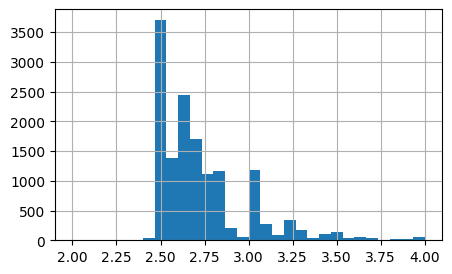

In [46]:
data['ceiling_height'].hist(range=(2, 4), bins=30, figsize=(5, 3));

Распределение не похоже на нормальное, однако для регламентируемого параметра это является ожидаемым.
Поэтому, несмотря на то, что пропусков в этом столбце много, мы **заполним их медианным значением для столбца**, так как оно относится к стандартным значениям этого параметра квартиры.

Попробуем два разных способа: заполним пропуски сначала медианным значением всего столбца, а затем зполним пропуски медианным значением в зависимости от населенного пункта и проверим, как это скажется на распределении.

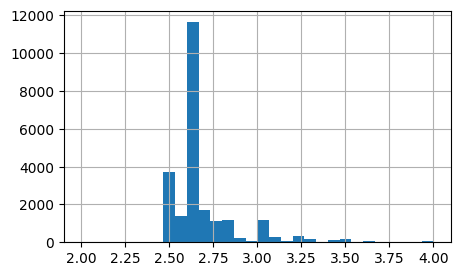

In [47]:
# заменим пропущенные значения в столбце 'ceiling_height' на 2.65м
data['ceiling_height'].fillna(data['ceiling_height'].median()).hist(range=(2,4), bins=30, figsize=(5, 3));

In [48]:
# заполним пропуски медианным значением там, где это возможно
for column in ['ceiling_height']:
    
    for cat in data['locality_name'].unique():
        # проверим наличие данных для подсчета медианы
        if len(data.loc[(data['locality_name'] == cat) & (~data[column].isna()), column]) != 0:
            
            data.loc[(data['locality_name'] == cat) & (data[column].isna()), column] = \
            data.loc[(data['locality_name'] == cat), column].median()

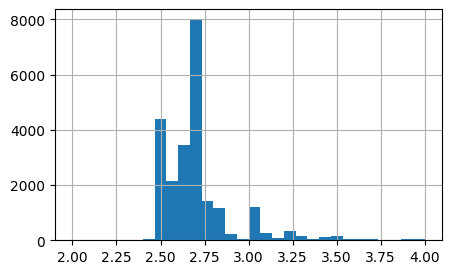

In [49]:
data['ceiling_height'].hist(range=(2, 4), bins=30, figsize=(5, 3));

Второй способ заметно меньше исказил распределение, поэтому воспользуемся именно им.

In [50]:
# проверим успешность замены
print('Оставшиеся пропуски в столбце "ceiling_height":', data['ceiling_height'].isna().sum())

Оставшиеся пропуски в столбце "ceiling_height": 95


Оставшиеся пропуски заменим общим медианным значением.

In [51]:
# заменим пропущенные значения в столбце 'ceiling_height' на 2.65м
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

# проверим успешность замены
print('Оставшиеся пропуски в столбце "ceiling_height":', data['ceiling_height'].isna().sum())

Оставшиеся пропуски в столбце "ceiling_height": 0


* ***Пропуски в столбце об общем количестве этажей в здании `floors_total`***

In [52]:
# посмотрим, в каких населенных пунктах есть пропуски:
data[data['floors_total'].isna()]['locality_name'].value_counts()

Санкт-Петербург    70
Мурино              4
Кудрово             2
Красное Село        2
Стрельна            1
Новоселье           1
Щеглово             1
Бугры               1
Новое Девяткино     1
Не указано          1
Токсово             1
Шушары              1
Name: locality_name, dtype: int64

In [53]:
print('Максимальная доля пропусков количества этажей внутри населенного пункта:', 
      f'{max_in_empty_col("floors_total")[0]:.0%}')
print('Среднее значение доли пропусков количества этажей внутри населенного пункта:', 
      f'{max_in_empty_col("floors_total")[1]:.1%}')

Максимальная доля пропусков количества этажей внутри населенного пункта: 5%
Среднее значение доли пропусков количества этажей внутри населенного пункта: 1.8%


Так как пропуски для этого параметра занимают небольшую долю как в целом внутри всего датасета, так и для каждого населенного пункта в отдельности, то **заменим пропуски медианным значением**. Замену проведём с учётом населенного пункта, чтобы учесть особенности застройки отдельных пригородов Санкт-Петербурга. Пропуски в количестве этажей квартир Санкт-Петербурга заполним отдельным шагом.

In [54]:
# проведём замену:
for loc in data[(data['floors_total'].isna()) & (data['locality_name'] != 'Санкт-Петербург')]['locality_name'].unique():
    data.loc[(data['locality_name'] == loc) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['locality_name'] == loc), 'floors_total'].median()
    
# проверим успешность замены:
print('Оставшиеся пропуски в столбце "floors_total":', data['floors_total'].isna().sum())

Оставшиеся пропуски в столбце "floors_total": 70


Посмотрим разброс этажей, на которых находится квартира, для квартир из Санкт-Петербурга.

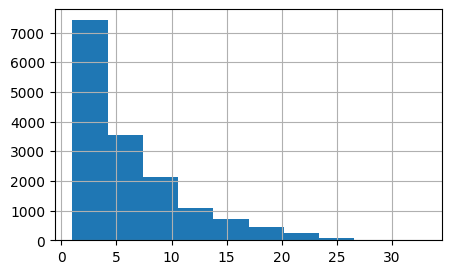

In [55]:
# посмотрим, какого распределение для этажей квартиры в Санкт-Петербурге
data[data['locality_name'] == 'Санкт-Петербург']['floor'].hist(figsize=(5, 3));

Медианное количество этажей для Санкт-Петербурга: 9.0


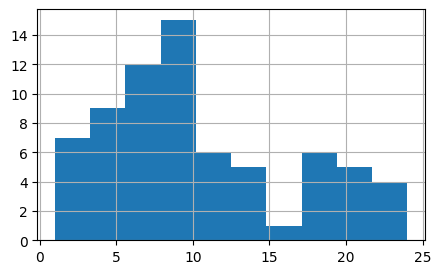

In [56]:
print('Медианное количество этажей для Санкт-Петербурга:', 
     data.loc[(data['locality_name'] == 'Санкт-Петербург'), 'floors_total'].median())

# посмотрим, на каких этажах расположены квартиры с пропусками об этажности здания
data[(data['locality_name'] == 'Санкт-Петербург') & (data['floors_total'].isna())]['floor'].hist(figsize=(5, 3));

Видно, что нередко в Петербурге продают квартиры на этажах, выше 10-го. Медианное значение для этажности зданий - 9. Однако в квартирах с пропусками о количестве этажей в здании встречаются расположенные на этажах выше медианного, то есть выше 9-го этажа. Получаем, что заполнение пропусков обычным медианным значением по всему городу может привести к несостыковке этажа квартиры и этажности здания.

Поэтому разделим квартиры на группы в зависимости от указанного этажа квартиры:

    группа 1: этаж с 1 по 5 включительно
    группа 2: этаж с 6 по 10 включительно
    и так далее

и заполним пропуски в `floors_total` Санкт-Петербурга в соответствии с медианным значением для этих групп.

In [57]:
# проведём замену:
for i in data[(data['floors_total'].isna())].index:
    
    if data.loc[i, 'floor'] in range(1, 6):
        data.loc[i, 'floors_total'] = \
        data.loc[(data['floor'] >= 1) & (data['floor'] < 6), 'floors_total'].median()
        
    elif data.loc[i, 'floor'] in range(6, 11):
        data.loc[i, 'floors_total'] = \
        data.loc[(data['floor'] >= 6) & (data['floor'] < 11), 'floors_total'].median()
        
    elif data.loc[i, 'floor'] in range(11, 16):
        data.loc[i, 'floors_total'] = \
        data.loc[(data['floor'] >= 11) & (data['floor'] < 16), 'floors_total'].median()
        
    elif data.loc[i, 'floor'] in range(16, 21):
        data.loc[i, 'floors_total'] = \
        data.loc[(data['floor'] >= 16) & (data['floor'] < 21), 'floors_total'].median()
        
    elif data.loc[i, 'floor'] in range(21, 26):
        data.loc[i, 'floors_total'] = \
        data.loc[(data['floor'] >= 21) & (data['floor'] < 26), 'floors_total'].median()
        
    elif data.loc[i, 'floor'] >= 26:
        data.loc[i, 'floors_total'] = \
        data.loc[(data['floor'] >= 26), 'floor'].median()
        
        
        
# проверим успешность замены:
print('Оставшиеся пропуски в столбце "floors_total":', data['floors_total'].isna().sum())

Оставшиеся пропуски в столбце "floors_total": 0


In [58]:
# проверим, возникли ли аномалии в столбце после замен
data.loc[(data['floor'] > data['floors_total']), ['floor'] + ['floors_total']]

,floor,floors_total
10058,21,9.0
14094,17,16.0
20146,15,5.0


In [59]:
# удалим аномалии из датасета
data = data[~((data['floor'] > data['floors_total']))]

# проверим успешность
print('Количество оставшихся аномалий:', data[((data['floor'] > data['floors_total']))]['floor'].count())

Количество оставшихся аномалий: 0


* ***Пропуски в столбце `days_exposition`***

In [60]:
# повторно выведем количество пропусков в этом столбце
print('Количество пропусков:', data[data['days_exposition'].isna()]['total_area'].count(),
     f"({data[data['days_exposition'].isna()]['total_area'].count() / len(data) :.0%})")

Количество пропусков: 3165 (13%)


Датасет представляет собой архив данных о продаже квартир, а это значит, что объявления об этих квартирах уже должны быть сняты либо просто по желанию продавца, либо вследствие осуществления сделки. В столбце `last_price` присутствует информация о последней цене квартиры перед снятием публикации, однако это не подтверждает факта осуществления сделки. Это означает, что мы не можем считать эти пропуски сигналом к тому, что эти квартиры не были проданы. Следовательно, эти пропуски могут сигнализировать о некоторой потере данных при переводе публикаций в архив.

Раннее было отмечено, что распределение этого столбца близко к Пуассоновскому, поэтому заполнить пропуски медианным значением может оказаться неккоректным. Проверим это предположение:

До замены пропусков:
AxesSubplot(0.125,0.11;0.775x0.77)


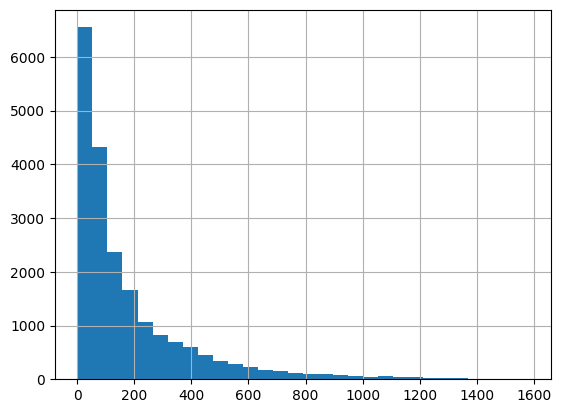

In [61]:
print('До замены пропусков:')
print(data['days_exposition'].hist(bins=30));

После замены пропусков:


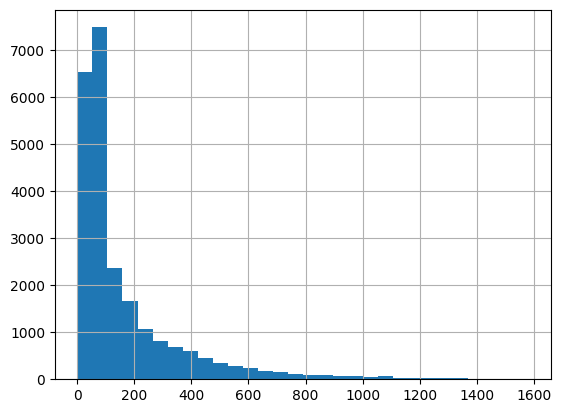

In [62]:
print('После замены пропусков:')
data['days_exposition'].fillna(data['days_exposition'].median()).hist(bins=30);

Как видно из графиков, замена исказила ожидаемое экспоненциальное затухание длительности размещения объявлений, поэтому **оставим эти пропуски без изменений.**

* ***Пропуски в столбцах `living_area` и `kitchen_area`***

Для заполнения пропусков воспользуемся также данными об общей площади квартиры `total_area`, количестве комнат `rooms`, количестве балконов `balcony` и типе жилья `studio`. Например, для студий, вероятно, что пропуски в площади кухни неслучайны: кухня входит в состав комнаты.

In [63]:
# рассмотрим данные о площади в студиях
data.loc[(data['studio'] == True), ('total_area', 'rooms', 'kitchen_area', 'living_area', 'balcony')].head()

,total_area,rooms,kitchen_area,living_area,balcony
144,27.00,0,NaN,15.50,2.0
440,27.11,0,NaN,24.75,2.0
608,25.00,0,NaN,NaN,0.0
697,24.10,0,NaN,17.50,0.0
716,17.00,0,NaN,12.00,0.0


In [64]:
# проверим, есть ли студии, в которых указана площадь кухни
print('Студии, в которых указана площадь кухни:',
      data.loc[(data['studio'] == True) & (~data['kitchen_area'].isna()), 'studio'].count())

Студии, в которых указана площадь кухни: 0


**Заменим для студий пропуски в площади кухни на 0.**

In [65]:
data.loc[(data['studio'] == True), 'kitchen_area'] = 0

# проверим успещность замены
print('Студии, в которых не указана площадь кухни:',
      data.loc[(data['studio'] == True) & (data['kitchen_area'].isna()), 'studio'].count())

Студии, в которых не указана площадь кухни: 0


Из таблицы видно, что жилая площадь не совпадает с площадью общей. Однако в квартире некоторую площадь занимают ванна и / или туалет, коридоры и балконы. Посмотрим, как в среднем соотносятся жилая площадь с общей в зависимости от количества балконов.

In [66]:
# функция, возвращающая отношение столбца с индексом ind1 к столбцу с индексом ind2
def ratio(row, ind1, ind2):
    return row[ind1] / row[ind2]

In [67]:
# найдём отношение общей площади квартиры к жилой площади
balcony_studio_pivot = (
    data[data['studio'] == True]
    .pivot_table(index='balcony', values=('total_area', 'living_area'))
)

# добавим новый столбец, а затем переопределим в нём значения для каждой строки
# (воспользоваться методом .apply() не вышло, т.к. функция ratio принимает 3 аргумента)
balcony_studio_pivot['ratio'] = 0
for st in range(len(balcony_studio_pivot)):
    balcony_studio_pivot.loc[st, 'ratio'] = ratio(balcony_studio_pivot.loc[st], ind1=1, ind2=0)
balcony_studio_pivot

,living_area,total_area,ratio
balcony,,,
0.0,20.225833,28.687714,1.418370
1.0,17.596111,26.303889,1.494869
2.0,18.198033,27.181639,1.493658


Исходя из полученных значений, **заменим пропуски в жилой площади студий** следующим образом:
* для квартир без балконов возьмём коэффициент 1.42
* для квартир с балконами - 1.5

In [68]:
for bal in data.loc[(data['living_area'].isna()) & (data['studio'] == True), 'balcony'].unique():
    if bal == 0:
        data.loc[(data['living_area'].isna()) & (data['studio'] == True) & (data['balcony'] == bal), 'living_area'] = \
        data.loc[(data['living_area'].isna()) & (data['studio'] == True) & (data['balcony'] == bal), 'total_area'] / 1.42
    else:
        data.loc[(data['living_area'].isna()) & (data['studio'] == True) & (data['balcony'] == bal), 'living_area'] = \
        data.loc[(data['living_area'].isna()) & (data['studio'] == True) & (data['balcony'] == bal), 'total_area'] / 1.5

In [69]:
# проверим успешность замены
print('Студии, в которых не указана жилая площадь:',
      data.loc[(data['studio'] == True) & (data['living_area'].isna()), 'studio'].count())

Студии, в которых не указана жилая площадь: 0


Пропуски для студий заполнены. Для обычных квартир пропуски необходимо заполнять с учётом не только балконов, но и количества комнат в квартире и площади кухни.

In [70]:
display(
    data.loc[data['studio'] == False, ('rooms', 'balcony', 'total_area', 'living_area', 'kitchen_area')]
    .groupby(['rooms', 'balcony'])
    .median()
    .head(10)
)

total_area  living_area  kitchen_area
rooms balcony                                       
0     0.0           27.15        18.70           NaN
      1.0           25.27        17.00           NaN
      2.0           26.55        18.00           NaN
1     0.0           36.00        17.60          9.00
      1.0           36.00        17.50          9.00
      2.0           38.75        17.81         10.00
      3.0           31.55        17.50          5.40
      4.0           42.75        18.95         10.40
      5.0           45.75        18.80         11.49
2     0.0           52.85        30.30          8.50

В полученной таблице попадаются квартиры с количеством комнат, равным нулю. Это могут быть изначально многокомнатные квартиры со снесенными разделительными стенами или могут являтся студиями, которые по какой-либо ошибке не отмечены в соответствующем столбце студиями. **Так как площадь кухни для этих квартир не указывается, отнесём их к студиям и повторим операции по замене пропусков, которые проделывали для студий выше.**

In [71]:
# переопределим нужные квартиры как студии
data.loc[(data['studio'] == False) & (data['rooms'] == 0), 'studio'] = True

# определим площадь кухни нулевой
data.loc[(data['studio'] == True), 'kitchen_area'] = 0

# повторим заполнение пропусков для студий
for bal in data.loc[(data['living_area'].isna()) & (data['studio'] == True), 'balcony'].unique():
    if bal == 0:
        data.loc[(data['living_area'].isna()) & (data['studio'] == True) & (data['balcony'] == bal), 'living_area'] = \
        data.loc[(data['living_area'].isna()) & (data['studio'] == True) & (data['balcony'] == bal), 'total_area'] / 1.42
    else:
        data.loc[(data['living_area'].isna()) & (data['studio'] == True) & (data['balcony'] == bal), 'living_area'] = \
        data.loc[(data['living_area'].isna()) & (data['studio'] == True) & (data['balcony'] == bal), 'total_area'] / 1.5

# проверим успешность замены
print('Студии, в которых не указана жилая площадь:',
      data.loc[(data['studio'] == True) & (data['living_area'].isna()), 'studio'].count())
print('Квартиры-не-студии с нулевым количеством комнат:',
     data.loc[(data['studio'] == False) & (data['rooms'] == 0)]['rooms'].count())

Студии, в которых не указана жилая площадь: 0
Квартиры-не-студии с нулевым количеством комнат: 0


Перед дальнейшей заменой пропусков, сделаем предварительную проверку на некорректные значения.

In [72]:
# выведем информацию о квартирах, в которых
# сумма жилой площади и площади квартиры больше или равна площади общей
display(data.dropna(subset=['living_area', 'kitchen_area'])
        .loc[((data['living_area'] + data['kitchen_area']) >= data['total_area']), 
         ['total_area', 'rooms', 'balcony', 'kitchen_area', 'living_area']].head())
print('Количество квартир с некорректным распределением площади:', 
     data.loc[((data['living_area'] + data['kitchen_area']) >= data['total_area']), 'total_area'].count(),
     f'({data.loc[((data["living_area"] + data["kitchen_area"]) >= data["total_area"]), "total_area"].count() / len(data) :.2%})')

,total_area,rooms,balcony,kitchen_area,living_area
184,30.20,1,0.0,6.20,26.10
220,37.00,1,0.0,9.00,28.00
545,23.80,1,0.0,5.00,20.00
551,31.59,1,2.0,9.28,30.55
601,53.70,2,2.0,7.00,48.30


Количество квартир с некорректным распределением площади: 136 (0.58%)


In [73]:
# невозможно придумать обоснованную замену этим данным, поэтому удалим эти квартиры из рассмотрения
data = data[~((data['living_area'] + data['kitchen_area']) >= data['total_area'])]
print('Количество квартир с некорректным распределением площади:', 
     data.loc[((data['living_area'] + data['kitchen_area']) >= data['total_area']), 'total_area'].count())

Количество квартир с некорректным распределением площади: 0


In [74]:
# выделим данные о площадях квартир в новую таблицу
data_area = (
    data.loc[data['studio'] == False, ('rooms', 'balcony', 'total_area', 'living_area', 'kitchen_area')]
    .pivot_table(index=['rooms', 'balcony'],
                 values=['rooms', 'balcony', 'total_area', 'living_area', 'kitchen_area'],
                 aggfunc='median')
)

In [75]:
# добавим столбец с суммой площади кухни и жилой площади
data_area['area_sum'] = data_area['kitchen_area'] + data_area['living_area']

# посчитаем коэффициент, связывающий area_sum и total_area
data_area['ratio_total'] = 0
for room, balcon in data_area.index:
    data_area['ratio_total'].loc[room, balcon] = ratio(data_area.loc[room, balcon], ind1=2, ind2=3)
    
# посчитаем коэффициент, связывающий площадь кухни и жилую площадь
data_area['ratio_liv_kit'] = 0
for room, balcon in data_area.index:
    data_area['ratio_liv_kit'].loc[room, balcon] = ratio(data_area.loc[room, balcon], ind1=1, ind2=0)

C:\Users\nasty\anaconda3\envs\practicum\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [76]:
data_area.head(10)

kitchen_area  living_area  total_area  area_sum  ratio_total  \
rooms balcony                                                                 
1     0.0             9.000         17.6      36.000    26.600     1.353383   
      1.0             9.000         17.5      36.000    26.500     1.358491   
      2.0            10.000         17.8      38.700    27.800     1.392086   
      3.0             5.400         17.5      31.550    22.900     1.377729   
      4.0            10.000         18.9      43.000    28.900     1.487889   
      5.0            11.595         18.9      46.125    30.495     1.512543   
2     0.0             8.500         30.3      52.800    38.800     1.360825   
      1.0             8.000         30.1      50.600    38.100     1.328084   
      2.0            10.000         31.0      57.000    41.000     1.390244   
      3.0            10.300         31.0      58.000    41.300     1.404358   

               ratio_liv_kit  
rooms balcony                 
1     0.0           1.955556  
      1.0           1.944444  
      2.0           1.780000  
      3.0           3.240741  
      4.0           1.890000  
      5.0           1.630013  
2     0.0           3.564706  
      1.0           3.762500  
      2.0           3.100000  
      3.0           3.009709

In [77]:
data_area[data_area['ratio_total'] <= 1.2]

,,kitchen_area,living_area,total_area,area_sum,ratio_total,ratio_liv_kit
rooms,balcony,,,,,,
4,3.0,12.0,74.0,102.5,86.0,1.191860,6.166667
9,1.0,32.9,225.9,292.2,258.8,1.129057,6.866261
10,0.0,19.8,161.4,216.1,181.2,1.192605,8.151515
15,0.0,100.0,409.0,590.0,509.0,1.159136,4.090000


Мы получили средние значения для отношений:
* общей площади квартиры и суммы площадей жилой и кухни `ratio_total`
* жилой площади к площади кухни `ratio_liv_kit`

в зависимости от количества комнат и балконов в квартире.

С помощью этих данных можно заполнить пропуски в `living_area` и `kitchen_area`, воспользовавшись такой системой:

    `living_area` / `kitchen_area` = `ratio_liv_kit`
    `living_area` + `kitchen_area` = `area_sum`
    
где `area_sum` находим с помощью коэффициента `ratio_total` из известных значений `total_area`.

Решим это уравнение для квартир, где неизвестны и жилая площадь, и площадь кухни.

In [78]:
print('Количество квартир с неизвестными и жилой площадью, и площадью кухни:', 
      data.loc[((data['living_area'].isna()) & (data['kitchen_area'].isna())),
         ['rooms', 'balcony', 'total_area', 'living_area', 'kitchen_area']]['rooms'].count())
data.loc[((data['living_area'].isna()) & (data['kitchen_area'].isna())),
         ['rooms', 'balcony', 'total_area', 'living_area', 'kitchen_area']].head(10)

Количество квартир с неизвестными и жилой площадью, и площадью кухни: 1444


,rooms,balcony,total_area,living_area,kitchen_area
3,3,0.0,159.0,NaN,NaN
30,1,0.0,32.8,NaN,NaN
37,2,0.0,45.8,NaN,NaN
44,1,1.0,40.0,NaN,NaN
59,1,0.0,46.5,NaN,NaN
60,1,0.0,35.0,NaN,NaN
81,1,0.0,68.0,NaN,NaN
82,3,0.0,80.5,NaN,NaN
133,1,0.0,31.0,NaN,NaN
164,2,2.0,40.3,NaN,NaN


In [79]:
# решим систему уравнений для случаев, когда неизвестны как жилая площадь, так и площадь кухни
for i in data[(data['living_area'].isna()) & (data['kitchen_area'].isna()) & (data['studio'] == False)].index:
    
    # фиксируем балконы и комнаты для таких квартир
    room = data.loc[i]['rooms']
    balcony = data.loc[i]['balcony']
    
    # вычисляем жилую площадь исходя из данных в data_area для таких квартир
    data.loc[i, 'living_area' ] = \
    (
        data_area.loc[room, balcony]['ratio_liv_kit'] * \
        (data.loc[i]['total_area'] / data_area.loc[room, balcony]['ratio_total'])
    ) / (1 + data_area.loc[room, balcony]['ratio_liv_kit'])
    
    # вычисляем площадь кухни с учётом рассчитанной жилой площади
    data.loc[i, 'kitchen_area'] = \
    (data.loc[i]['total_area'] / data_area.loc[room, balcony]['ratio_total']) - data.loc[i]['living_area']

In [80]:
print('Количество квартир с неизвестными и жилой площадью, и площадью кухни:', 
      data.loc[((data['living_area'].isna()) & (data['kitchen_area'].isna())),
         ['rooms', 'balcony', 'total_area', 'living_area', 'kitchen_area']]['rooms'].count())

Количество квартир с неизвестными и жилой площадью, и площадью кухни: 0


In [81]:
# проверим, не появились ли после заполнения значения, в которых
# сумма жилой площади и площади квартиры больше или равна площади общей
print('Количество квартир с некорректным распределением площади:', 
     data.loc[((data['living_area'] + data['kitchen_area']) >= data['total_area']), 'total_area'].count(),
     f'({data.loc[((data["living_area"] + data["kitchen_area"]) >= data["total_area"]), "total_area"].count() / len(data) :.2%})')

Количество квартир с некорректным распределением площади: 0 (0.00%)


Теперь заполним оставшиеся пропуски в случаях, где известен хотя бы один из параметров: площадь кухни или площадь квартиры.

In [82]:
print('Оставшиеся квартиры с пропусками в площадях квартир:',
      data[(data['living_area'].isna()) | (data['kitchen_area'].isna())]['rooms'].count())

Оставшиеся квартиры с пропусками в площадях квартир: 1053


In [83]:
# квартиры с неизвестной жилой площадью и не равной нулю площадью кухни
for i in data[(data['living_area'].isna()) & (data['kitchen_area'] != 0)].index:
    
    # фиксируем балконы и комнаты для таких квартир
    room = data.loc[i]['rooms']
    balcony = data.loc[i]['balcony']
    
    # вычисляем жилую площадь исходя из столбца `ratio_liv_kit` в data_area для таких квартир
    data.loc[i, 'living_area'] = \
    data_area.loc[room, balcony]['ratio_liv_kit'] * data.loc[i, 'kitchen_area']

In [84]:
print('Оставшиеся квартиры с пропусками в площадях квартир:',
      data[(data['living_area'].isna()) | (data['kitchen_area'].isna())]['rooms'].count())

Оставшиеся квартиры с пропусками в площадях квартир: 617


In [85]:
# проверим, не появились ли после заполнения значения, в которых
# сумма жилой площади и площади квартиры больше или равна площади общей
print('Количество квартир с некорректным распределением площади:', 
     data.loc[((data['living_area'] + data['kitchen_area']) >= data['total_area']), 'total_area'].count(),
     f'({data.loc[((data["living_area"] + data["kitchen_area"]) >= data["total_area"]), "total_area"].count() / len(data) :.2%})')

Количество квартир с некорректным распределением площади: 79 (0.34%)


Несколько квартир дали аномальные значения. Они появились из-за наших расчетов, а не исходных ошибок в данных, поэтому нужно не удалять эти значения, а изменить способ заполнения пропусков. Исправим расчетное значение жилой площади для этих квартир, основываясь не только на известном `kitchen_area`, но и на данном `total_area`:

    `living_area` = `area_sum` - `kitchen_area` = `total_area` / `ratio_total` - `kitchen_area`

In [86]:
# квартиры с плохо заполненными пропусками
for i in data[((data['living_area'] + data['kitchen_area']) >= data['total_area'])].index:
    
    # фиксируем балконы и комнаты для таких квартир
    room = data.loc[i]['rooms']
    balcony = data.loc[i]['balcony']
    
    # вычисляем жилую площадь заново
    data.loc[i, 'living_area'] = \
    data.loc[i, 'total_area'] / data_area.loc[room, balcony]['ratio_total'] - data.loc[i, 'kitchen_area']

In [87]:
# повторная проверка некорректных значений
print('Количество квартир с некорректным распределением площади:', 
     data.loc[((data['living_area'] + data['kitchen_area']) >= data['total_area']), 'total_area'].count(),
     f'({data.loc[((data["living_area"] + data["kitchen_area"]) >= data["total_area"]), "total_area"].count() / len(data) :.2%})')

Количество квартир с некорректным распределением площади: 0 (0.00%)


Аналогичные вычисления проведём для случаев с неизвестной площадью кухни.

In [88]:
# квартиры с неизвестной площадью кухни и не равной нулю жилой площадью
for i in data[(data['kitchen_area'].isna()) & (data['living_area'] != 0)].index:
    
    # фиксируем балконы и комнаты для таких квартир
    room = data.loc[i]['rooms']
    balcony = data.loc[i]['balcony']
    
    # вычисляем площадь кухни исходя из столбца `ratio_liv_kit` в data_area для таких квартир
    data.loc[i, 'kitchen_area'] = \
    data.loc[i, 'living_area'] / data_area.loc[room, balcony]['ratio_liv_kit']

In [89]:
print('Оставшиеся квартиры с пропусками в площадях:',
      data[(data['living_area'].isna()) | (data['kitchen_area'].isna())]['rooms'].count())

Оставшиеся квартиры с пропусками в площадях: 1


In [90]:
# выведем информацию о квартире с оставшимися пропусками
data.loc[(data['living_area'].isna()) | (data['kitchen_area'].isna()), 
         ['rooms', 'balcony', 'total_area', 'living_area', 'kitchen_area']]

,rooms,balcony,total_area,living_area,kitchen_area
12971,7,2.0,400.0,250.0,NaN


Значение могло оказаться незаполненным в том случае, если при расчете происходило деление на 0 или на NaN, т.е. если значение столбца `ratio_liv_kit` для данного типа квартир было 0 или NaN. Проверим, что хранится в таблице data_area для квартир с такими параметрами.

In [91]:
data_area.loc[7, 2]['ratio_liv_kit']

nan

Предположение подтвердилось. Чтобы произвести замену в этом случае, воспользуемся средним значением параметра `ratio_liv_kit` для квартир с двумя балконами.

In [92]:
# функия для расчета среднего коэффициента
def coef():
    c = 0
    s = 0

    for r, b in data_area[~data_area['ratio_liv_kit'].isna()].index:
        if (b == 2):
            c += 1
            s += data_area.loc[r, b]['ratio_liv_kit']
    return s/c

In [93]:
# заменим значение для оставшейся квартиры, имеющей индекс 12971
data.loc[12971, 'kitchen_area'] = \
data.loc[12971, 'living_area'] / coef()

In [94]:
print('Оставшиеся квартиры с пропусками в площадях:',
      data[(data['living_area'].isna()) | (data['kitchen_area'].isna())]['rooms'].count())

Оставшиеся квартиры с пропусками в площадях: 0


In [95]:
# проверим, не появились ли после заполнения значения, в которых
# сумма жилой площади и площади квартиры больше или равна площади общей
print('Количество квартир с некорректным распределением площади:', 
     data.loc[((data['living_area'] + data['kitchen_area']) >= data['total_area']), 'total_area'].count(),
     f'({data.loc[((data["living_area"] + data["kitchen_area"]) >= data["total_area"]), "total_area"].count() / len(data) :.2%})')

Количество квартир с некорректным распределением площади: 130 (0.55%)


Несколько квартир снова дали аномальные значения из-за наших замен. Исправим расчетное значение площади кухни для них, основываясь не только на известном `living_area`, но и на данном `total_area`:

    `kitchen_area` = `area_sum` - `living_area` = `total_area` / `ratio_total` - `living_area`

In [96]:
# квартиры с плохо заполненными пропусками
for i in data[((data['living_area'] + data['kitchen_area']) >= data['total_area'])].index:
    
    # фиксируем балконы и комнаты для таких квартир
    room = data.loc[i]['rooms']
    balcony = data.loc[i]['balcony']
    
    # вычисляем плоащадь кухни заново
    data.loc[i, 'kitchen_area'] = \
    data.loc[i, 'total_area'] / data_area.loc[room, balcony]['ratio_total'] - data.loc[i, 'living_area']
    
# повторная проверка некорректных значений
print('Количество квартир с некорректным распределением площади:', 
     data.loc[((data['living_area'] + data['kitchen_area']) >= data['total_area']), 'total_area'].count(),
     f'({data.loc[((data["living_area"] + data["kitchen_area"]) >= data["total_area"]), "total_area"].count() / len(data) :.2%})')

Количество квартир с некорректным распределением площади: 0 (0.00%)


Проверим, какие пропуски остались в датасете.

In [97]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4750
center_nearest           4750
parks_around3000         5355
parks_nearest           15398
ponds_around3000         4773
ponds_nearest           13781
days_exposition          3148
dtype: int64

In [98]:
print(
    'Средняя доля пропусков для картографических переменных, за исключением `ponds_nearest`, `parks_nearest`:',
    f"{data.loc[:, ['airports_nearest', 'center_nearest', 'parks_around3000', 'ponds_around3000']].isna().sum().mean() / len(data) :.0%}"
)
print(
    'Доля пропусков для `days_exposition`:',
    f"{data.loc[:, 'days_exposition'].isna().sum().mean() / len(data) :.0%}"
)
print(
    'Средняя доля пропусков для `ponds_nearest`, `parks_nearest`:',
    f"{data.loc[:, ['parks_nearest', 'ponds_nearest']].isna().sum().mean() / len(data) :.0%}"
)

Средняя доля пропусков для картографических переменных, за исключением `ponds_nearest`, `parks_nearest`: 21%
Доля пропусков для `days_exposition`: 13%
Средняя доля пропусков для `ponds_nearest`, `parks_nearest`: 62%


Не считая отсутствия значений в `days_exposition`, остались только пропуски, связанные с картографическими переменными. При этом колоссально количество пропусков в столбцах `ponds_nearest` и `parks_nearest`, что ставит под вопрос информативность и достоверность анализа квартир по этим категориям.

#### Преобразование типов данных

Посмотрим типы значений каждого из столбцов:

In [99]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
center_nearest          float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Проведём последовательную замену типов столбцов там, где это необходимо.

В `first_day_exposition` хранится дата появления объявления, поэтому **заменим тип столбца на datetime64.**

In [100]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [101]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# проверим успешность замены
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

В `floors_total` хранится количество этажей в здании, где продаётся квартира. Количество - это целое число, поэтому **тип столбца должен быть int.** Аналогично для столбцов `balcony`, `last_price`.

In [102]:
for col in ['floors_total', 'balcony', 'last_price']:
    data[col] = data[col].astype('int')
    # проверка успешности замены
    display(data[col].head())

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int32

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int32

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
Name: last_price, dtype: int32

Тип столбца `days_exposition` также должен быть int, но так как в столбце присутствуют пропуски, замену произвести не представляется возможным.

In [103]:
data.dtypes

total_images                     int64
last_price                       int32
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
center_nearest                 float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

Все необходимые замены были произведены успешно.

#### Очистка от аномалий

##### Столбцы без аномалий: `total_images`, `total_area`, `first_day_exposition`, `rooms`, `balcony`, `days_exposition`

* ***Столбец `total_images`***

In [104]:
# создадим список некоторых параметров квартиры
some_param = ['last_price', 'total_area', 'rooms', 'balcony', 'floor', 'ceiling_height', 'locality_name']

In [105]:
data['total_images'].describe()

count    23497.000000
mean         9.857556
std          5.676233
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Данные похожи на корректные: большинство выставляют около 10 фотографий, но есть заботливые продавцы, дающие более подробную визуальную информацию. Посмотрим на парметры квартиры с большим количеством фотографий.

In [106]:
data.loc[(data['total_images'] > 30), some_param]

,last_price,total_area,rooms,balcony,floor,ceiling_height,locality_name
99,9600000,90.0,4,0,2,2.70,Санкт-Петербург
308,5700000,83.9,3,0,2,2.60,Красное Село
1058,1900000,63.0,3,1,5,2.60,Лопухинка
5349,11990000,92.5,3,1,22,2.70,Санкт-Петербург
7393,8290000,113.2,4,0,4,2.70,Санкт-Петербург
7938,17000000,150.0,3,0,4,3.50,Санкт-Петербург
9778,11000000,87.0,2,5,11,2.70,Санкт-Петербург
10523,17000000,90.0,3,4,6,2.70,Санкт-Петербург
15157,17998000,138.6,4,2,17,2.70,Санкт-Петербург
17396,14500000,119.7,4,0,3,4.00,Санкт-Петербург


В основном это квартиры с более, чем 3 комнатами, большой общей площадью и несколькими балконами. Логично, что они требуют большего количества фотографий.

* ***Столбец `total_area`***

In [107]:
data['total_area'].describe()

count    23497.000000
mean        60.398920
std         35.720995
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

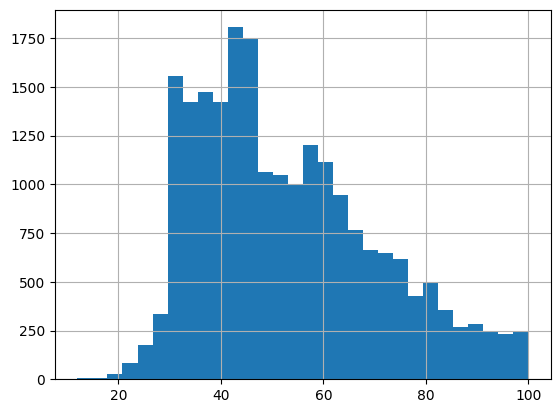

In [108]:
data['total_area'].hist(range=(12, 100), bins=30);

Посмотрим на данные квартир с крайними значениями общей площади.

In [109]:
data.loc[(data['total_area'] == 900) | (data['total_area'] == 12), some_param]

,last_price,total_area,rooms,balcony,floor,ceiling_height,locality_name
19540,420000000,900.0,12,0,25,2.80,Санкт-Петербург
19904,2400000,12.0,1,0,2,2.55,Санкт-Петербург


Обе квартиры находятся в Санкт-Петербурге. Квартиры с таким же значением общей площади и похожими ценами можно найти в продаже и на данный момент. Кроме того, распределение похоже на нормальное, но с ожидаемым длинным хвостом редких больших значений. Значит, аномалий в этом столбце нет.

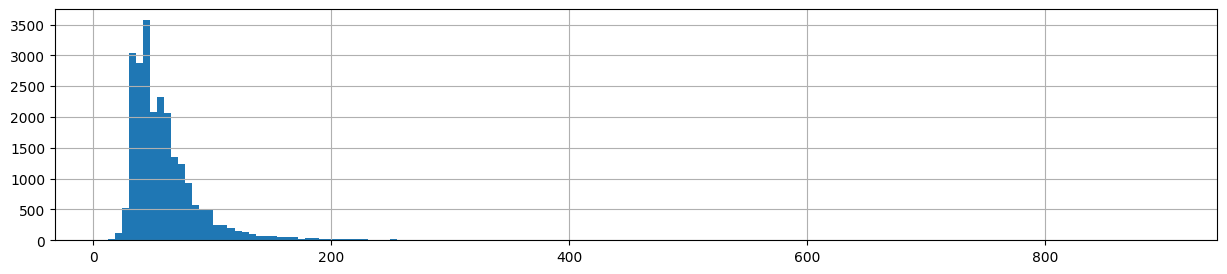

In [110]:
data['total_area'].hist(bins=150, figsize=(15, 3));

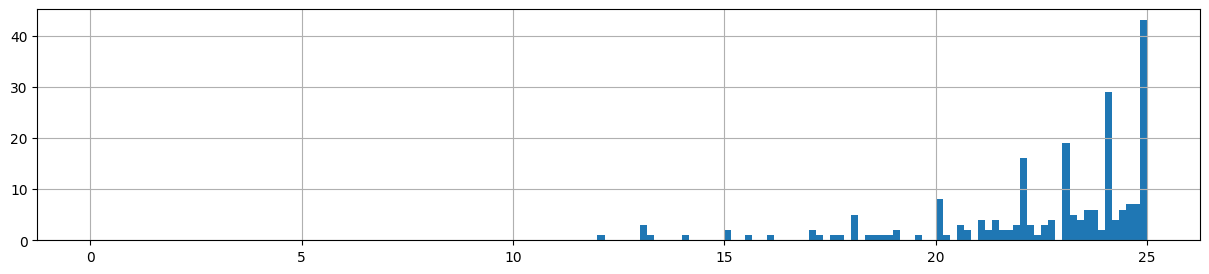

In [111]:
data['total_area'].hist(bins=150, range=(0, 25), figsize=(15, 3));

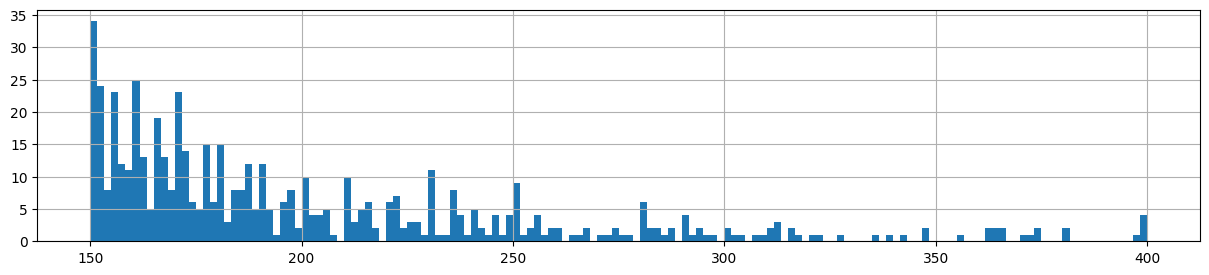

In [112]:
data['total_area'].hist(bins=150, range=(150, 400), figsize=(15, 3));

Квартиры с общей площадью менее 20 и более 300 метров квадратных являются достаточно редкими, исключим их из рассмотрения.

In [113]:
print('Количество редких квартир:', 
      len(data[(data['total_area'] > 300) | (data['total_area'] < 20)]), 
     f"({len(data[(data['total_area'] > 300) | (data['total_area'] < 20)]) / len(data) :.1%})")

Количество редких квартир: 88 (0.4%)


In [114]:
data = data[~(data['total_area'] > 300) & ~(data['total_area'] < 20)]

Количество редких квартир: 0 (0.0%)


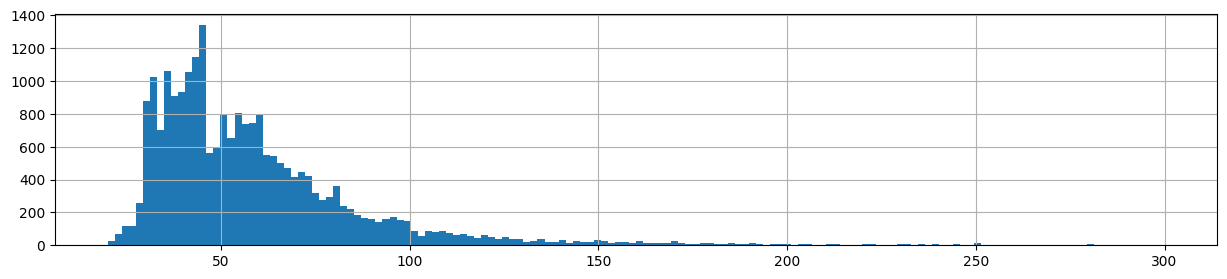

In [115]:
# проверим успешность очистки
print('Количество редких квартир:', 
      len(data[(data['total_area'] > 300) | (data['total_area'] < 20)]), 
     f"({len(data[(data['total_area'] > 300) | (data['total_area'] < 20)]) / len(data) :.1%})")

data['total_area'].hist(bins=150, figsize=(15, 3));

* ***Столбец `first_day_exposition`***

Начало: 2014-11-27 00:00:00
Начало: 2019-05-03 00:00:00


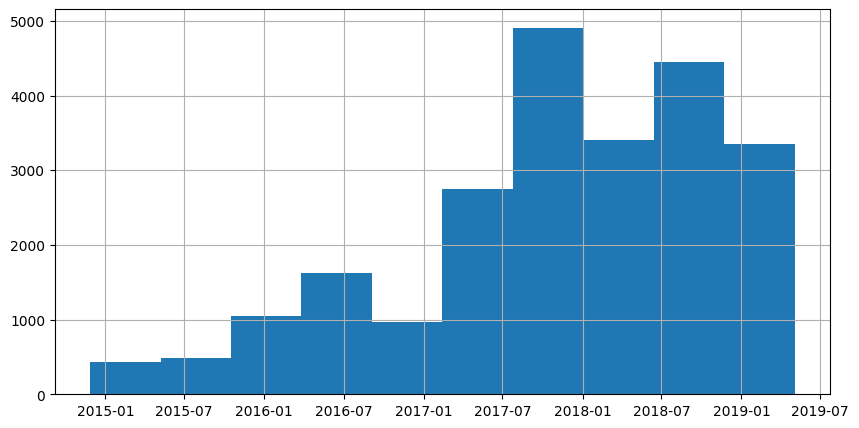

In [116]:
data['first_day_exposition'].hist(figsize=(10, 5))
print('Начало:', data['first_day_exposition'].min())
print('Начало:', data['first_day_exposition'].max())

В датасете собраны квартиры начиная с ноября 2014 по май 2019 года. Аномалий в датах нет.

* ***Столбец `rooms`***

In [117]:
data['rooms'].describe()

count    23409.000000
mean         2.062284
std          1.045839
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

Выбивается из массы квартира с 19 комнатами.

In [118]:
data.loc[(data['rooms'] == 16), some_param]

,last_price,total_area,rooms,balcony,floor,ceiling_height,locality_name
18848,28500000,270.0,16,1,4,3.0,Санкт-Петербург


Однако с такой общей площадью эта квартира вполне может иметь 16 комнат. Не будем её исключать или как-либо изменять значение.

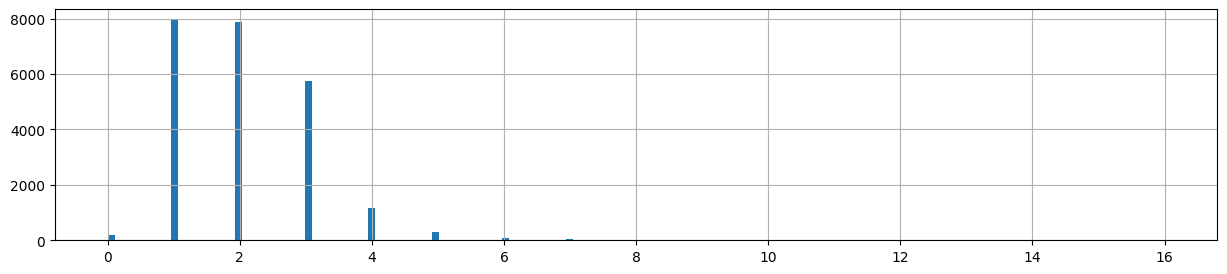

In [119]:
data['rooms'].hist(bins=150, figsize=(15, 3));

В целом квартиры, имеющие более 7 комнат, встречаются редко. Не будем их рассматривать дальше.

In [120]:
print('Количество редких квартир:', 
     len(data[data['rooms'] > 7]), 
     f"({len(data[data['rooms'] > 7]) / len(data) :0.2%})")

Количество редких квартир: 19 (0.08%)


In [121]:
data = data[~(data['rooms'] > 7)]

In [122]:
# проверка
print('Количество редких квартир:', 
     len(data[data['rooms'] > 7]), 
     f"({len(data[data['rooms'] > 7]) / len(data) :0.2%})")

Количество редких квартир: 0 (0.00%)


* ***Столбец `balony`***

In [123]:
data['balcony'].describe()

count    23390.000000
mean         0.590167
std          0.956699
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

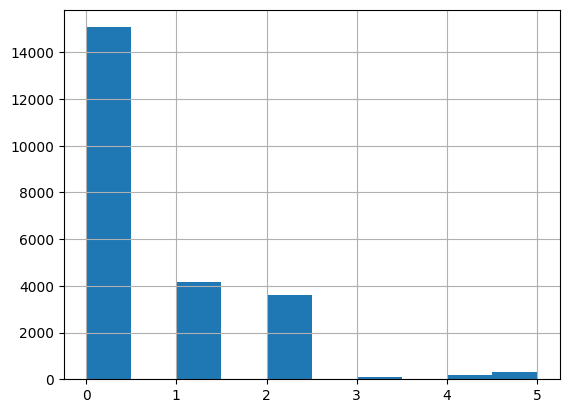

In [124]:
data['balcony'].hist();

Аномальные значения не наблюдаются.

* ***Столбец `days_exposition`***

In [125]:
data['days_exposition'].describe()

count    20260.000000
mean       180.655479
std        219.259219
min          1.000000
25%         45.000000
50%         95.500000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [126]:
print(f"Самая непривлекательная квартира выставлялась в течение примерно {1582 / 365 :.0f} лет")

Самая непривлекательная квартира выставлялась в течение примерно 4 лет


Данные в столбца `first_day_exposition` представлены с 2014 по 2019 год, длительность в 4 года укладывается в этот временной промежуток, поэтому не является аномальным значением.

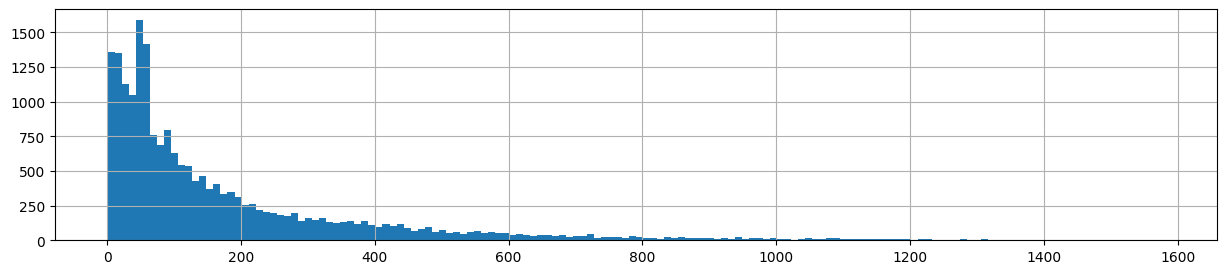

In [127]:
data['days_exposition'].hist(bins=150, figsize=(15, 3));

In [128]:
# редкими будем считать длительность более 1300 дней
print('Количество редких квартир:', 
     len(data[data['days_exposition'] > 1300]), 
     f"({len(data[data['days_exposition'] > 1300]) / len(data) :0.2%})")

Количество редких квартир: 51 (0.22%)


In [129]:
data = data[~(data['days_exposition'] > 1300)]

##### Столбец `last_price`

In [130]:
data['last_price'].describe()

count    2.333900e+04
mean     6.287653e+06
std      7.711565e+06
min      1.219000e+04
25%      3.429000e+06
50%      4.626540e+06
75%      6.740000e+06
max      3.300000e+08
Name: last_price, dtype: float64

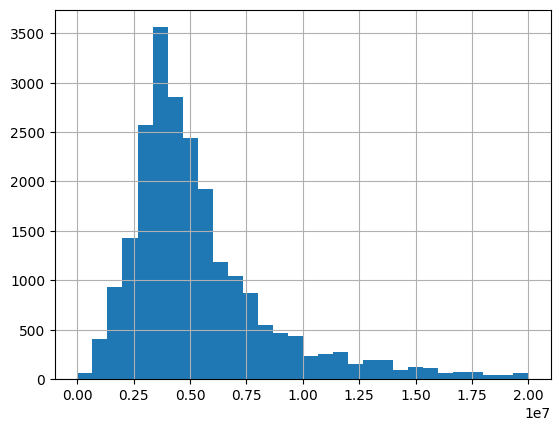

In [131]:
# распределение у медианного значения
data['last_price'].hist(range=(1e4, 2e7), bins=30);

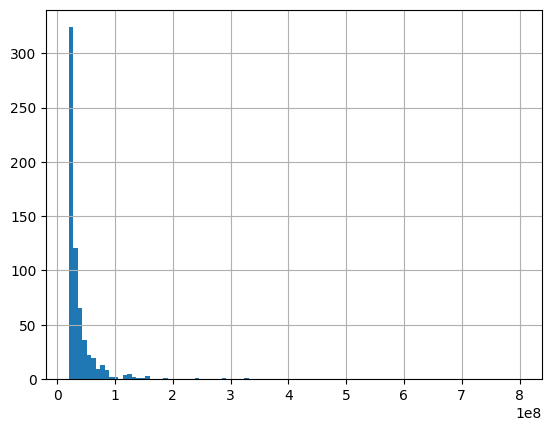

In [132]:
# значения за пределами третьего квартиля
data['last_price'].hist(range=(2e7, 8e8), bins=100);

Распределение цены похоже на нормальное распределение с длинным хвостом в сторону больших цен.

Изучим сначала данные "слева". Минимальное значение - чуть больше 10 000 рублей. Не похоже на цену за квартиру.

In [133]:
data.loc[(data['last_price'] == data['last_price'].min()), some_param]

,last_price,total_area,rooms,balcony,floor,ceiling_height,locality_name
8793,12190,109.0,2,0,25,2.75,Санкт-Петербург


Скорее всего, в значении указан неверный порядок величины. Посмотрим, сколько в среднем стоят квартиры в Санкт-Петербурге с таким же `total_area`.

In [134]:
data.loc[(data['total_area'] > 100) & (data['total_area'] < 115) & (data['locality_name'] == 'Санкт-Петербург'), 
         some_param].head(10)

,last_price,total_area,rooms,balcony,floor,ceiling_height,locality_name
0,13000000,108.0,3,0,8,2.70,Санкт-Петербург
179,14800000,108.7,3,0,5,4.00,Санкт-Петербург
213,8700000,111.4,4,0,2,3.10,Санкт-Петербург
260,17250000,102.4,3,1,3,2.70,Санкт-Петербург
276,23900000,108.4,3,0,6,3.06,Санкт-Петербург
315,13900000,108.0,4,0,2,2.70,Санкт-Петербург
389,8500000,103.8,4,0,3,2.70,Санкт-Петербург
475,16512000,103.2,3,2,5,2.70,Санкт-Петербург
495,10400000,104.0,5,0,4,3.50,Санкт-Петербург
567,9300000,106.9,1,0,2,3.10,Санкт-Петербург


In [135]:
(
    data
    .loc[(data['total_area'] > 100) & (data['total_area'] < 115) & (data['locality_name'] == 'Санкт-Петербург'), 'last_price']
    .describe()
)

count    5.320000e+02
mean     1.392229e+07
std      6.505260e+06
min      1.219000e+04
25%      1.000000e+07
50%      1.250435e+07
75%      1.550000e+07
max      8.200000e+07
Name: last_price, dtype: float64

В основном такие квартиры стоят около 10 млн. **Изменим порядок цены аномальной квартиры на 7.**

In [136]:
data.loc[(data['last_price'] == data['last_price'].min()), 'last_price'] = \
data['last_price'].min() / 10e4 * 10e7

# проверим успешность замены
print('Новая цена квартиры:', data.loc[8793, 'last_price'])

Новая цена квартиры: 12190000.0


Теперь выглядит правдоподобно. Проверим, есть ли ещё квартиры с заниженной ценой.

In [137]:
display(
    data
    .loc[(data['last_price'] < 1e6), some_param]
    .sort_values(by='last_price')
    .head(10)
)
print('Эти квартиры расположены в следующих населенных пунктах:')
print(data.loc[(data['last_price'] < 1e6), 'locality_name'].unique())

,last_price,total_area,rooms,balcony,floor,ceiling_height,locality_name
17456,430000.0,30.4,1,0,1,2.500,Сланцы
14911,430000.0,54.0,2,0,3,2.700,Свирь
16274,440000.0,40.0,1,0,1,2.700,Старополье
16219,450000.0,38.5,2,0,1,2.650,Вахнова Кара
9581,450000.0,43.4,2,0,3,2.700,Старополье
17676,450000.0,36.5,1,1,4,2.700,Ям-Тесово
5698,450000.0,42.0,2,0,1,2.615,Будогощь
23484,470000.0,44.5,2,0,2,2.500,Сланцы
21912,470000.0,37.0,1,0,3,2.600,Совхозный
16032,480000.0,32.0,1,0,1,2.500,Сланцы


Эти квартиры расположены в следующих населенных пунктах:
['Ефимовский' 'Сланцы' 'Ивангород' 'Сясьстрой' 'Синявино' 'Бокситогорск'
 'Вырица' 'Кузнечное' 'Кингисепп' 'Вещево' 'Паша' 'Чудской Бор' 'Коркино'
 'Подпорожье' 'Глажево' 'Белогорка' 'Цвылёво' 'Пикалёво' 'Луга' 'Важины'
 'Житково' 'Кириши' 'Будогощь' 'Старополье' 'Выборг' 'Ялгино' 'Почап'
 'Фалилеево' 'Пельгора' 'Торошковичи' 'Калитино' 'Серебрянский' 'Плодовое'
 'Никольский' 'Гатчина' 'Сижно' 'Торосово' 'Тёсово-4' 'Курковицы'
 'Кондратьево' 'Новая Ладога' 'Извара' 'Большая Вруда' 'Совхозный' 'Бор'
 'Свирь' 'Лужайка' 'Волхов' 'Вахнова Кара' 'Оредеж' 'Ромашки' 'Ям-Тесово'
 'Всеволожск' 'Шугозеро' 'Елизаветино' 'Громово' 'Каменногорск'
 'Котельский' 'Выскатка' 'Красная Долина' 'Пустынка' 'Форносово'
 'Отрадное' 'Большой Сабск' 'Светогорск' 'Малая Романовка' 'Пчевжа'
 'Володарское' 'Тихковицы']


Эти квартиры продаются в далеких от Петербурга пригородах, согласно одному из сайтов по поиску квартир для покупки, в этих пригородах действительно продаются квартиры меньше, чем за 1 млн рублей. Значит, эти значения датасета являются достоверными.

Теперь изучим самые дорогие квартиры.

In [138]:
data.loc[(data['last_price'] > 5e7), some_param].describe()

,last_price,total_area,rooms,balcony,floor,ceiling_height
count,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000
mean,8.679820e+07,203.492268,4.082474,0.360825,4.948454,3.179794
std,4.708439e+07,52.791850,1.221936,0.766289,2.623496,0.588658
min,5.078800e+07,90.000000,2.000000,0.000000,1.000000,2.700000
25%,5.900000e+07,160.000000,3.000000,0.000000,3.000000,2.700000
50%,7.200000e+07,200.000000,4.000000,0.000000,5.000000,3.000000
75%,9.000000e+07,249.700000,5.000000,0.000000,6.000000,3.380000
max,3.300000e+08,300.000000,7.000000,4.000000,15.000000,6.000000


Самая крупная цена составляет 800 млн рублей. Но квартиры за такую цену, судя по данным поисковиков, выставлялись. Среди `total_area` нет маленьких значений, следовательно, данные достоверны.

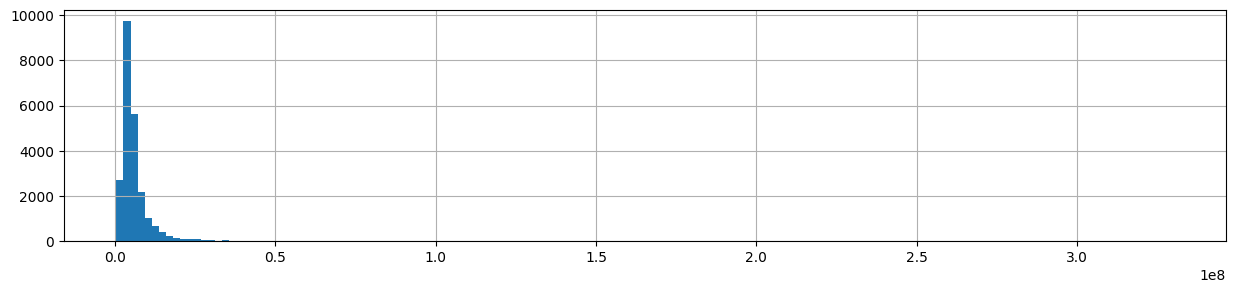

In [139]:
data['last_price'].hist(bins=150, figsize=(15, 3));

Квартиры, дороже 50 млн рублей, встречаются достаточно редко. Не будем их рассматривать.

In [140]:
print('Количество редких квартир:', 
     len(data[data['last_price'] > 0.5e8]), 
     f"({len(data[data['last_price'] > 0.5e8]) / len(data) :0.2%})")

Количество редких квартир: 97 (0.42%)


In [141]:
data = data[~(data['last_price'] > 0.5e8)]

##### Столбец `ceiling_height`

In [142]:
data['ceiling_height'].describe()

count    23242.000000
mean         2.722837
std          0.747645
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

Сразу же видно одно из аномально больших значений: 100 м.

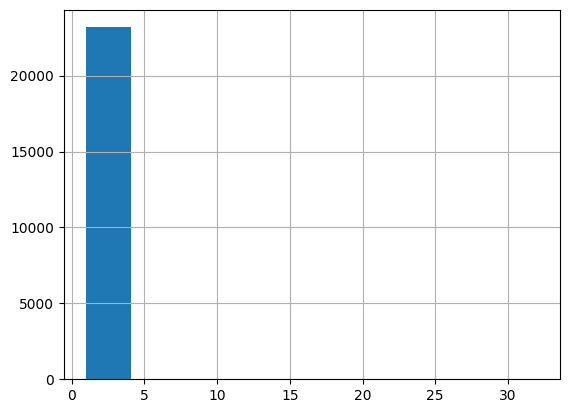

In [143]:
data.loc[data['ceiling_height'] != 100, 'ceiling_height'].hist();

Видно, что основная масса квартир имеет потолки до 5 м. Вероятно, что в квартирах с потолками более 25 м ошибка в порядке.

In [144]:
data.loc[(data['ceiling_height'] >= 22), some_param]

,last_price,total_area,rooms,balcony,floor,ceiling_height,locality_name
355,3600000.0,55.2,2,2,2,25.0,Гатчина
2158,1500000.0,42.0,2,0,2,27.0,Мины
3148,2900000.0,75.0,3,0,2,32.0,Волхов
4643,4300000.0,45.0,2,1,2,25.0,Санкт-Петербург
4876,3000000.0,25.0,0,2,17,27.0,Мурино
5076,3850000.0,30.5,1,0,1,24.0,Санкт-Петербург
5246,2500000.0,54.0,2,2,3,27.0,Мины
5669,4400000.0,50.0,2,2,3,26.0,Санкт-Петербург
5807,8150000.0,80.0,2,5,13,27.0,Санкт-Петербург
6246,3300000.0,44.4,2,0,5,25.0,Кронштадт


Никаких других особенностей в этих квартирах нет, поэтому **поделим высоту потолка этих квартир на 10.**

In [145]:
data.loc[(data['ceiling_height'] >= 22), 'ceiling_height'] = data['ceiling_height'] / 10

In [146]:
data.loc[data['ceiling_height'] >= 10, some_param]

,last_price,total_area,rooms,balcony,floor,ceiling_height,locality_name
15061,5600000.0,56.4,2,2,5,14.0,Санкт-Петербург
17496,6700000.0,92.9,3,5,14,20.0,Санкт-Петербург
22309,5300000.0,45.0,1,0,15,10.3,Санкт-Петербург


Осталось несколько квартир с высотой потолка от 10 метров, но эти значения делить на 10 уже нецелесообразно: получим аномально низкие потолки. Квартира высотой ровно 10 м отличается высокой ценой, но маленькой площадью. Вероятно, цена непосредственно обусловлена уникальной высотой потолка, и 10 м является достоверным значением. Рассмотрим эту квартиру немного позднее.

В высоте потолка оставшихся трех квартир, скорее всего, ошибка. Эти квартиры рассматривать далее не будем.

In [147]:
# удалим из датасета квартиры с аномально высокими потолками
data = data[data['ceiling_height'] <= 10]
# проверим успешность удаления
print('Количество квартир с аномально высокими потолками:',
      data[data['ceiling_height'] > 10]['rooms'].count())

Количество квартир с аномально высокими потолками: 0


In [148]:
# рассмотрим оставшиеся квартиры с высокими потолками
data.loc[data['ceiling_height'] > 5, some_param]

,last_price,total_area,rooms,balcony,floor,ceiling_height,locality_name
3474,1400000.0,30.0,1,0,2,8.0,Нурма
5863,5650000.0,45.0,1,1,14,8.3,Санкт-Петербург
7578,38000000.0,143.0,3,1,5,5.5,Санкт-Петербург
12628,3900000.0,50.0,1,0,5,5.3,Санкт-Петербург
15743,5600000.0,67.0,3,0,1,8.0,Санкт-Петербург
17442,5350000.0,54.0,2,1,2,8.0,Красное Село
21227,8200000.0,71.0,0,0,5,5.8,Санкт-Петербург


В сравнении с другими квартирами с высокими потолками становится ясно, что оставленная квартира с высотой потолков 10 м всё же вызывает вопросы. Такие же сомнения вызывают квартиры с высотой потолков около 8 метров. Эти квартиры также исключим из датасета.

Из оставшихся самое высокое значение имеет квартира с потолком в 6 метров, но при этом она имеет большую площадь и высокую цену. Возможно, это двухэтажная квартира, где есть комната с объёдиненными этажами. На данном этапе оставим эту квартиру среди наших данных.

In [149]:
data = data[data['ceiling_height'] <= 6]
# проверим успешность удаления
print('Количество квартир с аномально высокими потолками:',
      data[data['ceiling_height'] > 6]['rooms'].count())

Количество квартир с аномально высокими потолками: 0


Рассмотрим теперь аномально низкие значения.

In [150]:
# возьмем значение чуть меньше первого квартиля
data.loc[data['ceiling_height'] < 2.4, some_param]

,last_price,total_area,rooms,balcony,floor,ceiling_height,locality_name
227,2200000.0,47.00,3,0,1,2.34,Новый Свет
552,2999000.0,33.50,1,0,6,2.00,Санкт-Петербург
1582,4100000.0,45.60,2,2,8,2.30,Санкт-Петербург
2572,2400000.0,62.00,3,1,4,2.00,Луга
4212,2120000.0,35.43,1,2,9,2.00,Тосно
5498,2200000.0,56.00,2,2,1,2.30,Сясьстрой
5712,1500000.0,42.80,2,0,1,1.20,Мга
5850,1650000.0,35.50,1,0,5,2.00,Луга
11352,3300000.0,36.00,1,0,12,2.00,Металлострой
16446,12300000.0,88.30,3,0,2,2.00,Санкт-Петербург


В квартирах с высотой потолка от 2,2 до 2,4 м, возможно, добавлен натяжной потолок, который забирает несколько сантиметров у и без того невысокой квартиры. Эти данные оставим.

Для квартиры с высотой менее 2,2 м, к сожалению, найти логичное объяснение таким малым значениям не получается. Удалим эти квартиры из датасета.

In [151]:
data = data[data['ceiling_height'] > 2]
# проверим успешность удаления
print('Количество квартир с аномально высокими потолками:',
      data[data['ceiling_height'] <= 2]['rooms'].count())

Количество квартир с аномально высокими потолками: 0


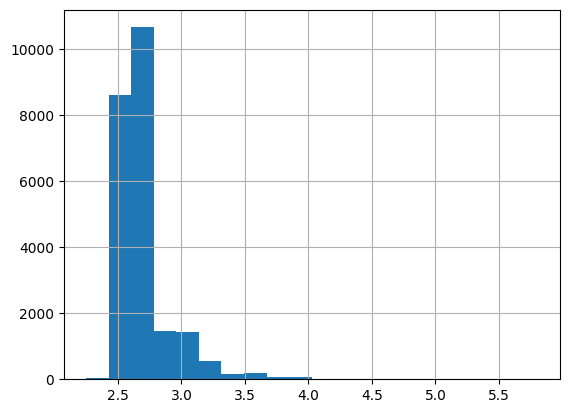

In [152]:
# посмотрим на обновленное распределение
data['ceiling_height'].hist(bins=20);

Распределение похоже на правду: максимум у стандартного значения и "тонкий" хвост относительно редких значений.

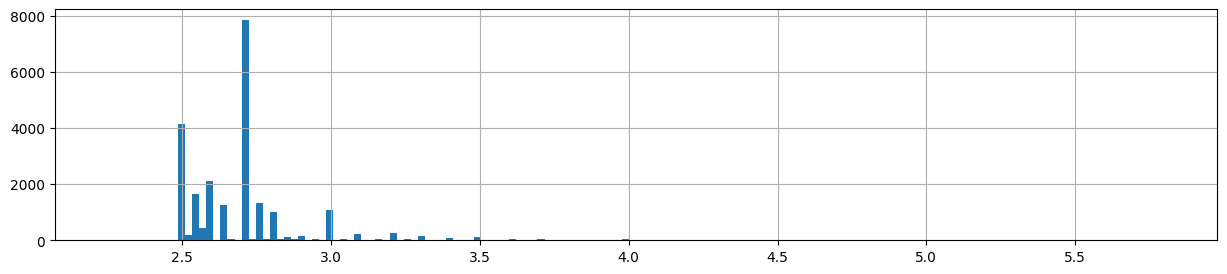

In [153]:
data['ceiling_height'].hist(bins=150, figsize=(15, 3));

Высоту потолка более 5 м можно считать достаточно редкой.

In [154]:
print('Количество редких квартир:', 
     len(data[data['ceiling_height'] > 4]), 
     f"({len(data[data['ceiling_height'] > 4]) / len(data) :0.2%})")

Количество редких квартир: 35 (0.15%)


In [155]:
data = data[~(data['ceiling_height'] > 4)]

##### Столбец `floors_total`

In [156]:
data['floors_total'].describe()

count    23186.000000
mean        10.724963
std          6.599851
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

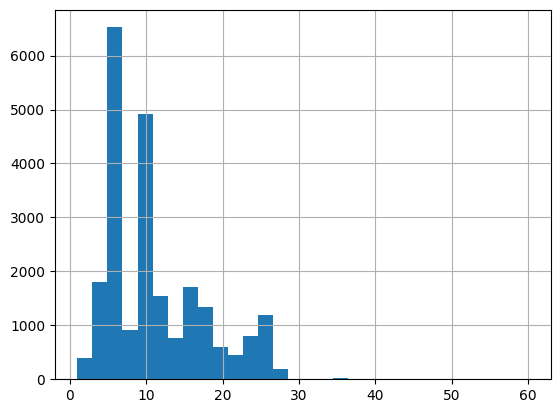

In [157]:
data['floors_total'].hist(bins=30);

Посмотрим на сильно выбивающиеся из общей массы значения.

In [158]:
data.loc[data['floors_total'] > 30, some_param + ['floors_total']]

,last_price,total_area,rooms,balcony,floor,ceiling_height,locality_name,floors_total
397,5990000.0,54.0,2,1,28,2.70,Санкт-Петербург,36
871,7777777.0,75.0,2,0,23,2.70,Санкт-Петербург,35
1697,3550000.0,28.0,1,0,23,2.65,Санкт-Петербург,34
1917,10150000.0,74.0,2,0,30,2.80,Санкт-Петербург,35
2253,3800000.0,45.5,2,0,4,2.88,Кронштадт,60
2966,4300000.0,37.0,1,0,15,2.70,Санкт-Петербург,35
4855,5500000.0,50.0,1,0,4,2.80,Санкт-Петербург,35
5749,3590000.0,25.0,0,2,26,2.80,Санкт-Петербург,35
5807,8150000.0,80.0,2,5,13,2.70,Санкт-Петербург,36
5808,4590000.0,43.0,1,0,11,2.70,Санкт-Петербург,35


Подозрительной является квартира в Кронштадте: там нет таких высоток, чтобы был 60-й этаж. Скорее всего, здесь случайно добавлен лишний десяток. Посмотрим на другие квартиры в Кронштадте.

In [159]:
# выведем этажность зданий, встречающихся в Кронштадте
print(data.loc[data['locality_name'] == 'Кронштадт', 'floors_total'].value_counts())
data.loc[data['locality_name'] == 'Кронштадт', 'floors_total'].describe()

5     31
3     14
4     11
12     9
9      7
11     6
7      5
8      3
10     3
2      2
13     1
15     1
20     1
60     1
Name: floors_total, dtype: int64


count    95.000000
mean      7.147368
std       6.483971
min       2.000000
25%       4.000000
50%       5.000000
75%       9.000000
max      60.000000
Name: floors_total, dtype: float64

Видно, что большинство зданий имеют не более 10 этажей. А 60 - уже является выбросом. Заменим это значение на 6.

In [160]:
data.loc[data['floors_total'] == 60, 'floors_total'] = 6
# проверим успешность замены
data.loc[2253, 'floors_total']

6

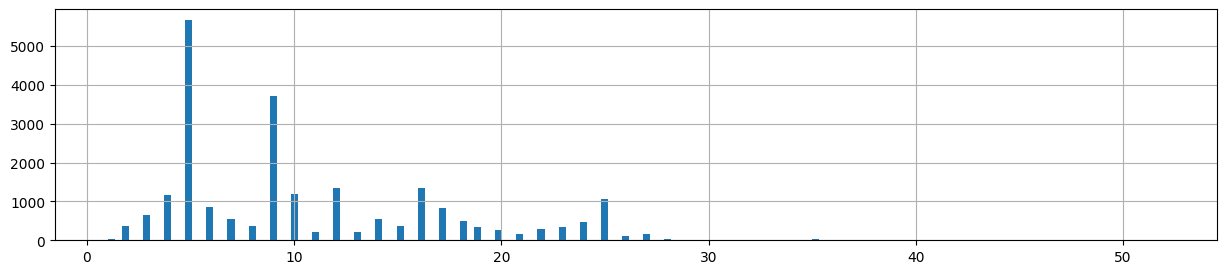

In [161]:
data['floors_total'].hist(bins=150, figsize=(15, 3));

Прдеставителей в здании с количеством этажей более 30 можем считать редкими.

In [162]:
print('Количество редких квартир:', 
     len(data[data['floors_total'] > 30]), 
     f"({len(data[data['floors_total'] > 30]) / len(data) :0.2%})")

Количество редких квартир: 29 (0.13%)


##### Столбцы `living_area` и `kitchen_area`

Исходные данные были проверены на аномальные значения вида, когда сумма площади кухни и жилой площади была равна или превышала общую площадь квартиры, при заполнении пропусков. Изначальные аномальные данные были удалены. Заполнение пропусков происходило с отслеживанием и исправлением возникающих аномальных значений этого вида.

In [163]:
# проверим, что некорректных значений нет
print('Количество некорректных значений', 
      data.loc[((data['living_area'] + data['kitchen_area']) >= data['total_area']), 'rooms'].count())

Количество некорректных значений 0


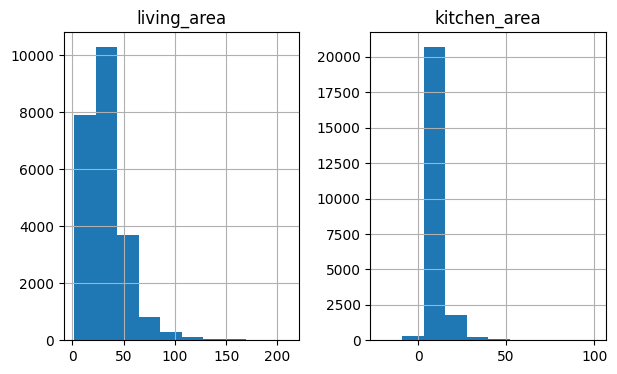

In [164]:
# посмотрим на распределение после замен
data.loc[:, ['living_area', 'kitchen_area']].hist(figsize=(7, 4));

В ходе замены пропусков появились квартиры с отрицательной площадью кухни.

In [165]:
# выведем информацию о квартирах с отрицательной площадью кухни и/или отрицательной или равной нулю жилой площадью
print('Количество квартир с аномалиями второго вида:', 
      data.loc[(data['living_area'] <= 0) | (data['kitchen_area'] < 0), 'rooms'].count(),
      f"({data.loc[(data['living_area'] <= 0) | (data['kitchen_area'] < 0), 'rooms'].count() / len(data) :.1%})"
     )
data.loc[(data['living_area'] <= 0) | (data['kitchen_area'] < 0), some_param + ['living_area', 'kitchen_area']].head()

Количество квартир с аномалиями второго вида: 48 (0.2%)


,last_price,total_area,rooms,balcony,floor,ceiling_height,locality_name,living_area,kitchen_area
424,11500000.0,98.0,3,1,3,2.65,Санкт-Петербург,88.0,-13.909220
1280,2200000.0,23.0,1,0,21,2.70,Мурино,17.0,-0.005556
1544,3300000.0,26.0,1,0,6,2.70,Санкт-Петербург,20.0,-0.788889
2720,3900000.0,68.0,3,0,1,4.00,Кронштадт,57.0,-6.326027
2959,2550000.0,32.0,1,1,13,2.75,Кудрово,30.2,-6.644444


Это квартиры, в которых изначально стояла чересчур большая жилая площадь по отношению к общей площади, вследствие чего при заполнении пропусков в площади кухни появились отрицательные значения. 

In [166]:
# посмотрим информацию об отношении жилой площади к общей для квартир с аномалиями
data_check = data[(data['living_area'] <= 0) | (data['kitchen_area'] < 0)].loc[:, ['total_area', 'living_area']]

# посчитаем отношение жилой площади к общей
data_check['ratio'] = 0
for st in data_check.index:
    data_check.loc[st, 'ratio'] = ratio(data_check.loc[st], ind1=1, ind2=0)

print('Отношение жилой площади к общей в среднем для квартир с аномалиями:', round(data_check['ratio'].mean(), 2))

Отношение жилой площади к общей в среднем для квартир с аномалиями: 0.82


In [167]:
# посмотрим информацию об отношении жилой площади к общей для квартир без аномалий
data_check2 = data[~((data['living_area'] <= 0) | (data['kitchen_area'] < 0))].loc[:, ['total_area', 'living_area']]

# посчитаем отношение жилой площади к общей
data_check2['ratio'] = 0
for st in data_check2.index:
    data_check2.loc[st, 'ratio'] = ratio(data_check2.loc[st], ind1=1, ind2=0)
    
print('Отношение жилой площади к общей в среднем для квартир без аномалий:', round(data_check2['ratio'].mean(), 2))

Отношение жилой площади к общей в среднем для квартир без аномалий: 0.56


Предположение подтвердилось: для квартир с аномалиями необосновано большая жилая площадь в сравнении с общей площадью. Вероятно, для этих квартир в графе `living_area` изначально указана уже сумма жилой площади и кухни, а не только жилой площади. 

Будем считать, что это действительно так, и перезапишем значения в столбцах `living_area` и `kitchen_area` так же, как это делали при заполнении пропусков, но будем считать, что нам уже известна достоверная сумма жилой площади и площади кухни, и на данный момент она записана в столбце `living_area`.

In [168]:
# квартиры с аномалиями
for i in data[(data['living_area'] <= 0) | (data['kitchen_area'] < 0)].index:
    
    # фиксируем балконы и комнаты для таких квартир
    room = data.loc[i]['rooms']
    balcony = data.loc[i]['balcony']
    
    # вычисляем новую жилую площадь исходя из данных в data_area для таких квартир
    # и считая, что в датасете нам дана сумма площадей
    area_sum = data.loc[i, 'living_area']
    data.loc[i, 'living_area' ] = \
    (
        data_area.loc[room, balcony]['ratio_liv_kit'] * \
        area_sum
    ) / (1 + data_area.loc[room, balcony]['ratio_liv_kit'])
    
    # вычисляем площадь кухни с учётом рассчитанной жилой площади
    data.loc[i, 'kitchen_area'] = \
    area_sum - data.loc[i]['living_area']

In [169]:
# проверим, что аномалии второго типа отсутствуют
print('Количество квартир с аномалиями второго вида:', 
      data.loc[(data['living_area'] <= 0) | (data['kitchen_area'] < 0), 'rooms'].count())

Количество квартир с аномалиями второго вида: 0


In [170]:
# проверим, не появилось ли аномалий первого типа
print('Количество некорректных значений', 
      data.loc[((data['living_area'] + data['kitchen_area']) >= data['total_area']), 'rooms'].count())

Количество некорректных значений 0


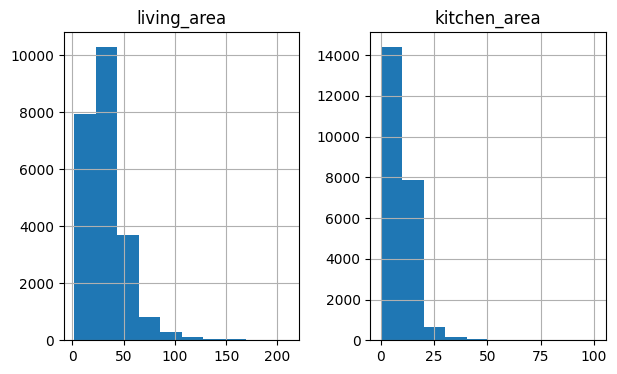

In [171]:
# посмотрим на распределение после замен
data.loc[:, ['living_area', 'kitchen_area']].hist(figsize=(7, 4));

Распределения похожи на правду и согласуются друг с другом. Считаем, что аномалий в столбцах больше не осталось.

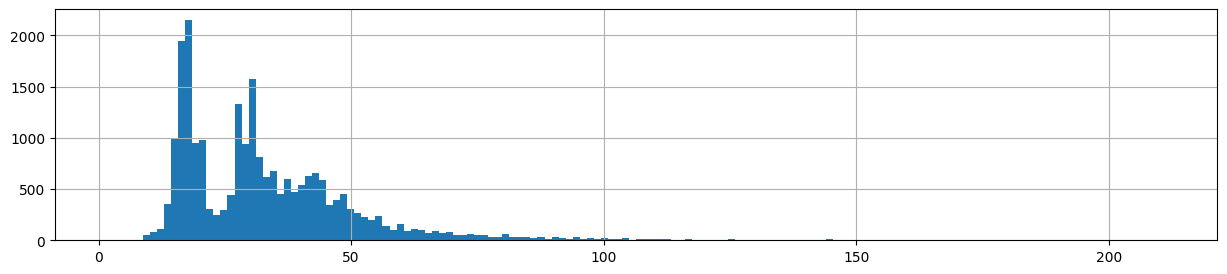

In [172]:
data['living_area'].hist(bins=150, figsize=(15, 3));

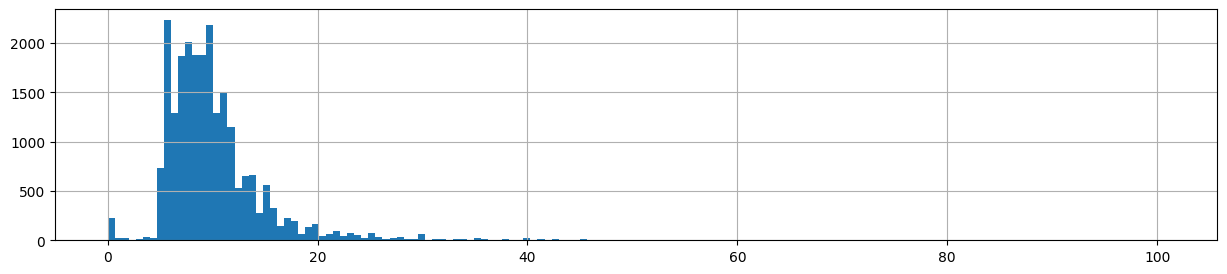

In [173]:
data['kitchen_area'].hist(bins=150, figsize=(15, 3));

In [174]:
print('Количество редких квартир:', 
     len(data[data['living_area'] > 150]), 
     f"({len(data[data['living_area'] > 150]) / len(data) :0.2%})")

Количество редких квартир: 40 (0.17%)


In [175]:
print('Количество редких квартир:', 
     len(data[data['kitchen_area'] > 50]), 
     f"({len(data[data['kitchen_area'] > 50]) / len(data) :0.2%})")

Количество редких квартир: 25 (0.11%)


In [176]:
data = data[~(data['living_area'] > 150) & ~(data['kitchen_area'] > 50)]

##### Столбец `floor`

In [177]:
data['floor'].describe()

count    23122.000000
mean         5.906280
std          4.892353
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Аномалий не обнаружено.

##### Столбцы с картографическими данными

In [178]:
cart_param = ['airports_nearest', 'center_nearest', 'parks_nearest', 'parks_around3000', 'ponds_nearest', 'ponds_around3000']

In [179]:
print('Количество квартир с отрицательным значением расстояний:', 
      data.loc[(
        (data['airports_nearest'] < 0) |
        (data['center_nearest'] < 0) |
        (data['parks_nearest'] < 0) |
        (data['ponds_nearest'] < 0)), 'rooms'].count())

Количество квартир с отрицательным значением расстояний: 0


In [180]:
data.loc[(data['parks_around3000'] < 0), 'parks_around3000'].value_counts()

-3.0    70
Name: parks_around3000, dtype: int64

In [181]:
data.loc[(data['ponds_around3000'] < 0), 'ponds_around3000'].value_counts()

-3.0    652
Name: ponds_around3000, dtype: int64

Отрицательные значения встречаются только в двух столбцах, при этом встречается только значение -3, которое было намеренно добавлено нами при замене пропусков.

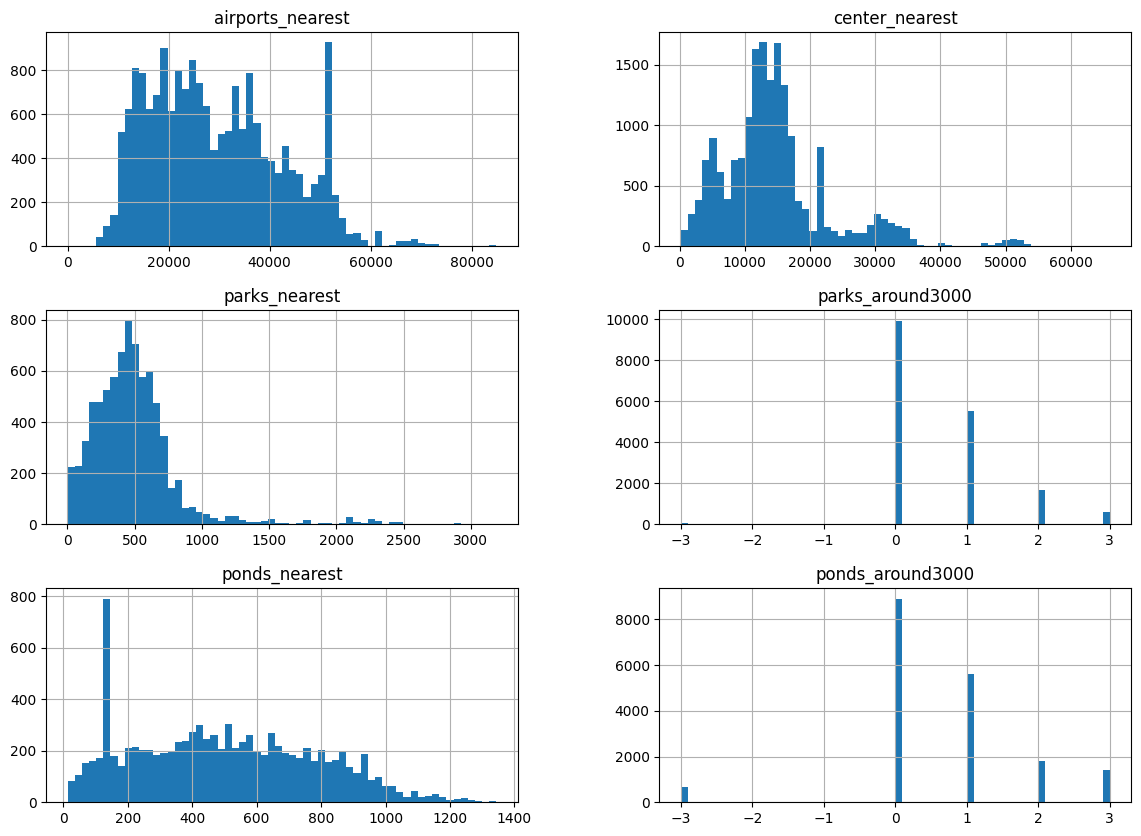

In [182]:
data.loc[:, cart_param].hist(bins=60, figsize=(14, 10));

В распределении с ближайшими водоёмами сильно выбивается некоторый пик в районе 100-150 м. Посмотрим, какие квартиры дают этот вклад.

In [183]:
# найдём расстояние до водоёма, к которому относитя больше всего квартир, в промежутке между 90 и 190 м
(
    data
    .pivot_table(index='ponds_nearest', values='last_price', aggfunc='count')
    .query('ponds_nearest > 90 and ponds_nearest < 190')
    .sort_values('last_price', ascending=False)
)

,last_price
ponds_nearest,
133.0,592
153.0,39
136.0,27
145.0,25
170.0,24
...,...
156.0,1
131.0,1
137.0,1


In [184]:
# посмотрим, какие квартиры находятся на расстоянии 133 м от водоёмов
data.loc[data['ponds_nearest'] == 133, 'locality_name'].value_counts()

Мурино             581
Санкт-Петербург      9
Сестрорецк           1
Павловск             1
Name: locality_name, dtype: int64

In [185]:
# посмотрим, есть какие-либо ещё данные о расстояниях до водоёмов для квартир в Мурино
data.loc[data['locality_name'] == 'Мурино', 'ponds_nearest'].value_counts()

133.0    581
Name: ponds_nearest, dtype: int64

Получаем, что этот выброс, скорее всего, является следствием заполнения пропусков: в датасете изначально была указана только одна квартира в Мурино с указанным расстоянием до водоёма. При заполнении пропусков медиана приняла именно это значение. Квартир в Мурино оказалось много, все они заполнились одним одинаковым значением, что дало такое сильное искажение распределения. Чтобы это исправить, заменим значение 133 в Мурино на пустое.

In [186]:
data.loc[data['locality_name'] == 'Мурино', 'ponds_nearest'] = None

In [187]:
# проверим успешность замены
data.loc[data['locality_name'] == 'Мурино', 'ponds_nearest'].value_counts()

Series([], Name: ponds_nearest, dtype: int64)

Похожие пики проявляются и для распределения расстояний до центра и до аэропорта (около 21 000 м и рядом с 50 000 м соответственно). Посмотрим, к чему относятся эти пики.

In [188]:
print('Города с расстоянием до аэропорта около 50 000 м:')
data[(data['airports_nearest'] > 49000) & (data['airports_nearest'] < 52000)]['locality_name'].value_counts()

Города с расстоянием до аэропорта около 50 000 м:


Санкт-Петербург    681
Мурино             581
Ломоносов           17
Сестрорецк           2
Name: locality_name, dtype: int64

In [189]:
print('Города с расстоянием до центра около 21 000 м:')
data[(data['center_nearest'] > 20000) & (data['center_nearest'] < 22000)]['locality_name'].value_counts()

Города с расстоянием до центра около 21 000 м:


Мурино             581
Санкт-Петербург    275
Парголово           70
Стрельна             2
Name: locality_name, dtype: int64

И там и там за этот пик снова отвечают данные из Мурина. Обнулим эти значения.

In [190]:
data.loc[data['locality_name'] == 'Мурино', 'airports_nearest'] = None
data.loc[data['locality_name'] == 'Мурино', 'center_nearest'] = None

In [191]:
# проверим успешность замены
data.loc[data['locality_name'] == 'Мурино', 'airports_nearest'].value_counts()

Series([], Name: airports_nearest, dtype: int64)

In [192]:
# проверим успешность замены
data.loc[data['locality_name'] == 'Мурино', 'center_nearest'].value_counts()

Series([], Name: center_nearest, dtype: int64)

In [193]:
# проверим теперь случаи с нулевым расстоянием
print('Количество квартир с нулевым значением расстояний:', 
      data.loc[(
        (data['airports_nearest'] == 0) |
        (data['center_nearest'] == 0) |
        (data['parks_nearest'] == 0) |
        (data['ponds_nearest'] == 0)), 'rooms'].count())

Количество квартир с нулевым значением расстояний: 1


In [194]:
data.loc[(
        (data['airports_nearest'] == 0) |
        (data['center_nearest'] == 0) |
        (data['parks_nearest'] == 0) |
        (data['ponds_nearest'] == 0)), cart_param + ['locality_name']]

,airports_nearest,center_nearest,parks_nearest,parks_around3000,ponds_nearest,ponds_around3000,locality_name
21085,0.0,22801.0,NaN,0.0,NaN,0.0,Санкт-Петербург


В датасете есть квартира, находящаяся непосредственно в аэропорту. Можно было бы попробовать заменить такое аномальное значение на медиану для населенного пункта, но нам известно, что эта квартира находится в Санкт-Петербурге, а не в отдельном небольшом посёлке. Внутри Петербурга расстояние до аэропорта сильно различается, поэтому медианное значение не будет являться хорошей заменой. **Удалим эту квартиру из датасета.**

In [195]:
data = data[(data['airports_nearest'] != 0)]

# проверка удаления
# проверим теперь случаи с нулевым расстоянием
print('Количество квартир с нулевым значением расстояний:', 
      data.loc[(
        (data['airports_nearest'] == 0) |
        (data['center_nearest'] == 0) |
        (data['parks_nearest'] == 0) |
        (data['ponds_nearest'] == 0)), 'rooms'].count())

Количество квартир с нулевым значением расстояний: 0


In [196]:
# посмотрим статистику для картографических переменных
data[(data['parks_around3000'] != -3) & (data['ponds_around3000'] != -3)][cart_param].describe()

,airports_nearest,center_nearest,parks_nearest,parks_around3000,ponds_nearest,ponds_around3000
count,17743.000000,17743.000000,7788.000000,17722.000000,8808.000000,17722.000000
mean,28880.061602,14352.775771,492.159733,0.598634,521.462761,0.757364
std,12742.395602,8611.255483,340.949260,0.790515,277.648041,0.928414
min,6450.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,18500.000000,9496.000000,289.000000,0.000000,299.000000,0.000000
50%,26859.000000,13188.000000,456.000000,0.000000,505.000000,0.000000
75%,37407.000000,16399.000000,613.000000,1.000000,733.000000,1.000000
max,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


Больше аномально маленьких или больших значений в картографических переменных не встречается.

**Вывод:** в ходе предобработки, датасет был по возможности очищен от пропусков, а также проверен на наличие аномальных значений.

Основные итоги в ходе предобработки:

* в именах населенных пунктов устранено имя статуса населенного пункта, чтобы избежать неявных дубликатов;
* было обнаружено, что большинство пропусков среди картографических переменных сгруппированы друг с другом (20% от всего датасета), что может являться сигналом к ошибкам в работе программы, рассчитывающей эти данные;
* доли пропусков в столбцах `parks_nearest` и `ponds_nearest` составляют более 60% от всего датасета, что делает эти параметры малоинформативными и малодостоверными;
* в датасете остались квартиры с пропусками в картографических переменных (так как логической замены нет, но удаление поведёт к удалению более половины данных) и в столбце `days_exposition` (удаление поведёт к потере 13% данных)

### Добавление дополнительных параметров

#### Цена одного квадратного метра

In [197]:
data['price_per_area'] = data['last_price'] / data['total_area']

In [198]:
# проверим успешность расчета
data.loc[:, ['last_price', 'total_area', 'price_per_area']].head()

,last_price,total_area,price_per_area
0,13000000.0,108.0,120370.370370
1,3350000.0,40.4,82920.792079
2,5196000.0,56.0,92785.714286
4,10000000.0,100.0,100000.000000
5,2890000.0,30.4,95065.789474


#### День недели публикации объявления

In [199]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [200]:
# проверим успешность расчета
data.loc[:, ['first_day_exposition', 'weekday']].head()

,first_day_exposition,weekday
0,2019-03-07,3
1,2018-12-04,1
2,2015-08-20,3
4,2018-06-19,1
5,2018-09-10,0


####  Месяц публикации объявления

In [201]:
data['month'] = data['first_day_exposition'].dt.month

In [202]:
# проверим успешность расчета
data.loc[:, ['first_day_exposition', 'month']].head()

,first_day_exposition,month
0,2019-03-07,3
1,2018-12-04,12
2,2015-08-20,8
4,2018-06-19,6
5,2018-09-10,9


#### Год публикации объявления

In [203]:
data['year'] = data['first_day_exposition'].dt.year

In [204]:
# проверим успешность расчета
data.loc[:, ['first_day_exposition', 'year']].head()

,first_day_exposition,year
0,2019-03-07,2019
1,2018-12-04,2018
2,2015-08-20,2015
4,2018-06-19,2018
5,2018-09-10,2018


#### Тип этажа квартиры

In [205]:
# напишем функцию, возвращающую тип этажа квартиры
def floor_type(row):
    
    if row['floor'] == row['floors_total'] and row['floors_total'] != 1:
        return 'Последний'
    elif row['floor'] == 1:
        return 'Первый'
    return 'Другой'

In [206]:
# создадим новый столбец
data['floor_type'] = 0

# переопределим с помощью функции
data['floor_type'] = data.apply(floor_type, axis=1)

In [207]:
# проверим успешность
data.loc[:, ['floor', 'floors_total', 'floor_type']].head()

,floor,floors_total,floor_type
0,8,16,Другой
1,1,11,Первый
2,4,5,Другой
4,13,14,Другой
5,5,12,Другой


#### Расстояние до центра города в км

In [208]:
data['center_km'] = round(data['center_nearest'] / 1000)

In [209]:
# проверим успешность
data.loc[:, ['center_nearest', 'center_km']].head()

,center_nearest,center_km
0,16028.0,16.0
1,18603.0,19.0
2,13933.0,14.0
4,8098.0,8.0
5,NaN,NaN


### Исследовательский анализ данных

#### Общие параметры объектов

##### Общая площадь, жилая площадь и площадь кухни

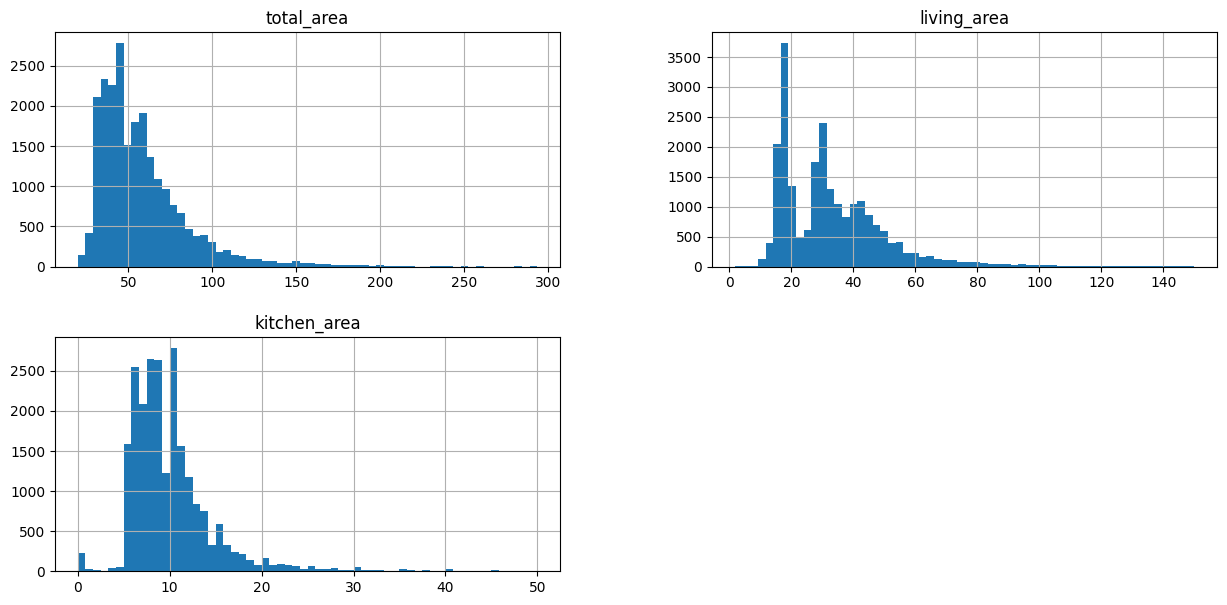

In [210]:
data.loc[:, ['total_area', 'living_area', 'kitchen_area']].hist(bins=60, figsize=(15, 7));

Распределение площади квартир похоже на нормальное. Для каждого параметра наблюдается достаточно длинный хвост редких значений: при поиске аномалий мы выяснили, что это реальные квартиры, но их редкость ожидаема: большие квартиры стоят дороже, их количество меньше, поэтому и выставляются реже. То, что их количество меньше, мы  видим непосредственно на гистограммах. Связь с ценой квартиры будет проверена отдельно.

В основном в датасете представлены квартиры с общей площадью около 45 м². В среднем, жилая площадь квартир делится на 3 группы: чуть менее 20 м², около 30 м² и около 40 м². Площадь кухни в большинстве составляет 5-12 м². Уже можно сделать вывод о том, что для среднестатистической квартиры площадь кухни в два раза меньше жилой площади.

##### Цена объекта

In [211]:
data['last_price'].describe()

count    2.312100e+04
mean     5.887169e+06
std      4.679943e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.680000e+06
max      5.000000e+07
Name: last_price, dtype: float64

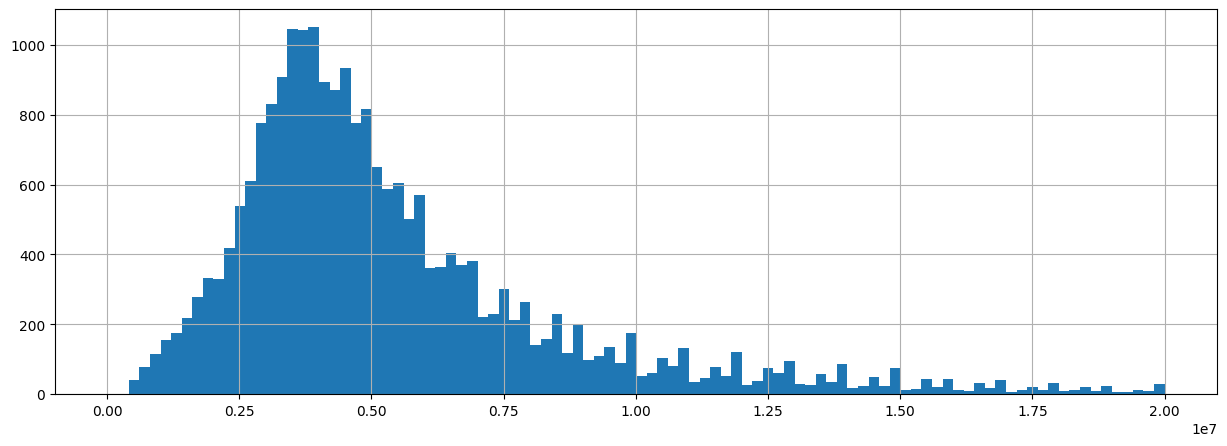

In [212]:
# распределение у медианного значения
data['last_price'].hist(range=(1e4, 2e7), bins=100, figsize=(15, 5));

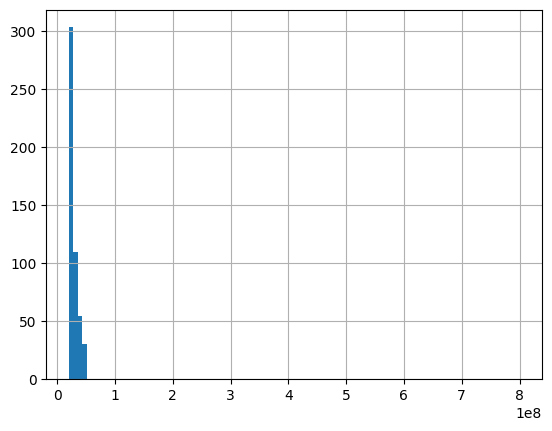

In [213]:
# правый "хвост" распределения
data['last_price'].hist(range=(2e7, 8e8), bins=100);

Вид распределения цены по объектам аналогичен виду распределения для площади квартир: нормальное распределение с длинным хвостом равномерно убывающих значений. То, что спад количества квартир с растущей ценой происходит равномерно, подтверждает отсутствие аномальных значений: эти квартиры имеют некоторые выделяющиеся особенности, повышающие цену. На это в разной степени могут влиять и высота потолков, и площадь квартир, и наличие парков / водоёмов поблизости.

Большая часть квартир в датасете продаётся в диапазоне от 2,5 до 6 млн рублей.

##### Количество комнат

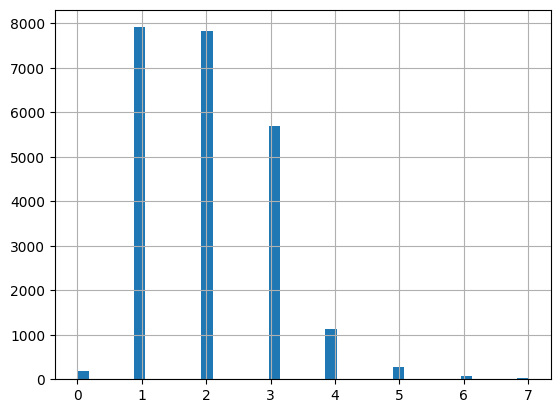

In [214]:
data['rooms'].hist(bins=40);

В отличие от предыдущих графиков, здесь мы видим дискретное распределение, что объясняется тем, что количество комнат может быть только целым (не может быть 2,5 комнаты). В остальном вид распределения аналогичен предыдущим.

В основном продаются квартиры с 1-3 комнатами. Студии (квартир с 0 комнат) продают реже, чем 4-комнатные или 5-комнатные квартиры, но примерно столько же, сколько и 6-комнатные квартиры.

##### Высота потолков

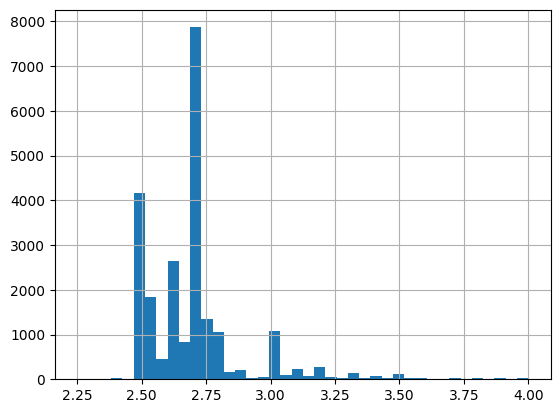

In [215]:
data['ceiling_height'].hist(bins=40);

Распределение, убывающее к большим значениям, характеризуется двумя знаковыми областями:

1. Максимум в области около 2,6 метров. Он связан со стандартным значением потолков для большинства квартир в России.
2. Новая "волна" распределения, начинающаяся от 3-х метров. С такой высотой потолков строились так называемые сталинки, которых в Санкт-Петербурге немало, поэтому, скорее всего, именно квартиры в этих домах дают такой вклад в распределение.

In [216]:
# проверим, что в освном дома с потолком от 3 до 3,5 м находятся в Санкт-Петербурге и ближайших крупных пригородах,
# а не в отдаленных поселках, где сталинок быть не должно
data.loc[(data['ceiling_height'] >= 3) & (data['ceiling_height'] <= 3.5), 'locality_name'].value_counts()

Санкт-Петербург    1910
Пушкин               34
Сестрорецк           20
Колпино              19
Новое Девяткино      18
                   ... 
Мга                   1
имени Свердлова       1
Заневка               1
Шушары                1
Ивангород             1
Name: locality_name, Length: 61, dtype: int64

Действительно, основной вклад - дома в Санкт-Петербурге, как и предполагалось. Видно, что встречаются такие объекты и в небольших посёлках. Вероятно, это относится уже к частным постройкам.

##### Этаж квартиры, тип этажа квартиры, этажность зданий

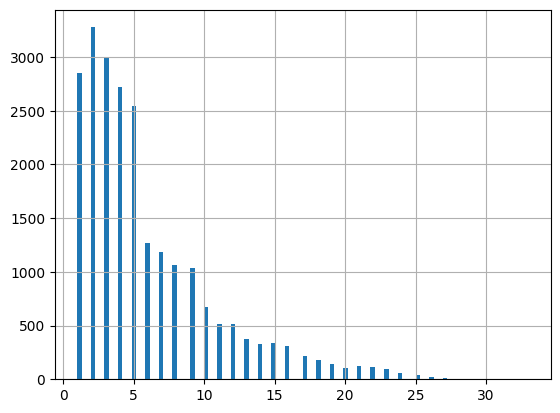

In [217]:
data['floor'].hist(bins=100);

In [218]:
print('Доля квартир на первом этаже:',
     f"{data.loc[data['floor'] == 1, 'floor'].count() / len(data) :.2%}")

Доля квартир на первом этаже: 12.34%


В датасете больше всего квартир, находящихся на первом этаже, чем на каком-либо другом отдельном этаже: больше 12%.

С ростом этажа количество квартир убывает, однако зависимость имеет дополнительный ступенчатый характер: равномерное убывание для первых 4-х этажей заканчивается резким скачком на 5-м этаже, затем это поведение дублируется, но имеет не такой выраженный характер. Возможно, что эта ступенчатая составляющая связана с этажностью зданий, в которых продаются квартиры, или типом этажа квартиры.

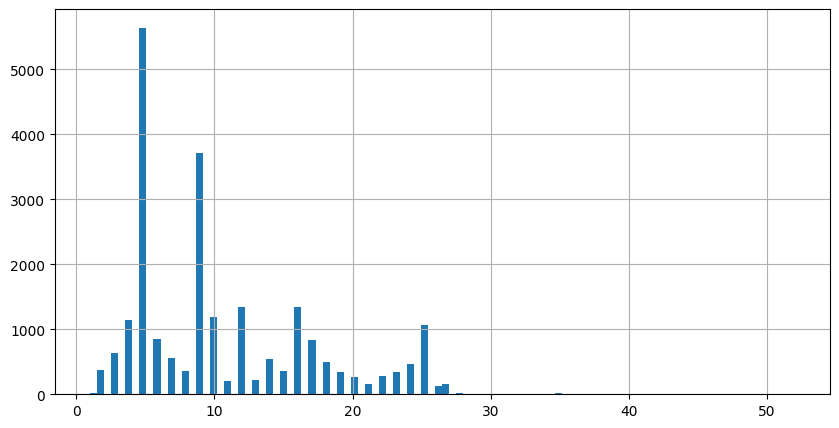

In [219]:
data['floors_total'].hist(bins=100, figsize=(10,5));

Распределение для этажности зданий тоже имеет резкие перепады, причем отдельные "пиковые" значения этажности (5, 9) совпадают с более резкими падениями в распределении этажей квартир.

Больше всего квартир продаётся в зданиях высотою в 5 и 9 этажей, следом идут 10-, 12-, 16-, 25-этажные здания.

In [220]:
print('Коэффициент Пирсона:', f"{data['floor'].corr(data['floors_total']) :.2}")

Коэффициент Пирсона: 0.68


Между этими двумя параметрами существует некоторая корреляция. Возможно, эа связь вызвана типом этажа квартиры.

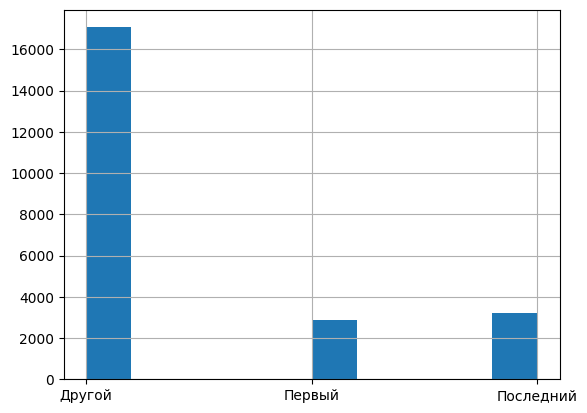

In [221]:
data['floor_type'].hist();

Больше всего квартир покупают на этажах, которые не являются ни первыми, ни последними. Это может объяснить, почему зданий с 9-ю (5-ю) этажами много, а покупают / продают на 9-м (5-м) этаже мало: люди не хотят покупать жильё на последнем этаже.

##### Расстояние до центра города

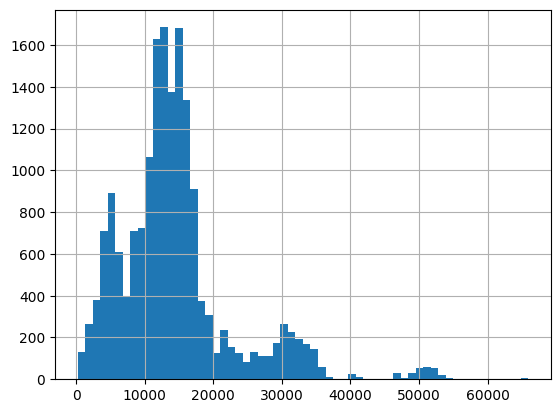

In [222]:
data['center_nearest'].hist(bins=60);

Распределение имеет несколько выделенных областей: 
* около 5,5 км
* 11-15 км
* около 21 км
* 29-35 км
* 49-53 км

Такой вид, скорее всего, говорит нам о ряде сгруппированных и относительно крупных населенных пунктов, находящихся на соответствующем расстоянии от центра Санкт-Петербурга.

In [223]:
# посмотрим, какие населенные пункты к каким областям относятся
print('Пункты с расстоянием до центра около 5,5 км:',
     data.loc[(data['center_nearest'] > 5000) & (data['center_nearest'] < 6000), 'locality_name'].unique())
print('Пункты с расстоянием до центра около 11-15 км:',
     data.loc[(data['center_nearest'] > 9000) & (data['center_nearest'] < 15000), 'locality_name'].unique())
print('Пункты с расстоянием до центра около 21 км:',
     data.loc[(data['center_nearest'] > 19000) & (data['center_nearest'] < 22000), 'locality_name'].unique())
print('Пункты с расстоянием до центра около 29-30 км:',
     data.loc[(data['center_nearest'] > 28000) & (data['center_nearest'] < 35000), 'locality_name'].unique())
print('Пункты с расстоянием до центра около 49-53 км:',
     data.loc[(data['center_nearest'] > 49000) & (data['center_nearest'] < 53000), 'locality_name'].unique())

Пункты с расстоянием до центра около 5,5 км: ['Санкт-Петербург' 'Не указано']
Пункты с расстоянием до центра около 11-15 км: ['Санкт-Петербург' 'Не указано']
Пункты с расстоянием до центра около 21 км: ['Парголово' 'Санкт-Петербург' 'Шушары' 'Стрельна']
Пункты с расстоянием до центра около 29-30 км: ['Петергоф' 'Пушкин' 'Колпино' 'Павловск' 'Сестрорецк' 'Шушары'
 'Красное Село' 'Понтонный' 'Санкт-Петербург' 'Металлострой' 'Щеглово'
 'Лисий Нос' 'Не указано' 'Усть-Ижора']
Пункты с расстоянием до центра около 49-53 км: ['Ломоносов' 'Кронштадт' 'Зеленогорск' 'Петергоф']


Таким образом, первую область можно отнести к центральной части Санкт-Петербурга, вторую - к остальной части Питера, но ещё не на краях города, третью область - к окраинам и ближайшим пригородам, и далее - более удаленные населенные пункты.

Можно сделать вывод, что больше всего квартир продаётся именно в нецентральных районах Петербурга.

Кроме того, скорее всего, большинство квартир, в которых их местоположение числится как "Не указано", на самом деле относятся непосредственно к Санкт-Петербургу, так как значение "Не указано" встречается в первых двух выделенных областях.

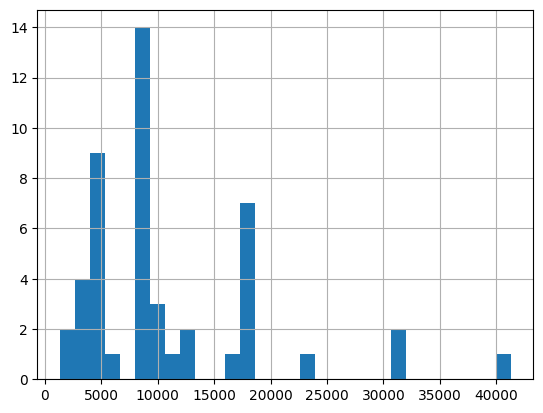

In [224]:
# посмотрим распределение расстояния до центра города
# для квартир с неуказанным `location_name` 
data.loc[data['locality_name'] == 'Не указано', 'center_nearest'].hist(bins=30);

In [225]:
print('Всего квартир с неизвестным местоположением:', 
      data.loc[(data['locality_name'] == 'Не указано'), 'center_nearest'].count())
print('Количество квартир с неизвестным местоположением, находящихся в пределах Санкт-Петербурга:', 
      data.loc[(data['locality_name'] == 'Не указано') & (data['center_nearest'] < 15000), 'center_nearest'].count())
print('Доля квартир с неизвестным местоположением, но в пределах Санкт-Петербурга относительно всех квартир с неизвсетным местоположением:', 
      round(data.loc[(data['locality_name'] == 'Не указано') & (data['center_nearest'] < 15000), 'center_nearest'].count() / \
     data.loc[(data['locality_name'] == 'Не указано'), 'center_nearest'].count(), 2))

Всего квартир с неизвестным местоположением: 48
Количество квартир с неизвестным местоположением, находящихся в пределах Санкт-Петербурга: 36
Доля квартир с неизвестным местоположением, но в пределах Санкт-Петербурга относительно всех квартир с неизвсетным местоположением: 0.75


Действительно, большая часть квартир с пропущенным указанием населенного пункта (более 70%) находятся именно в самом Санкт-Петербурге.

##### Расстояние до ближайшего аэропорта

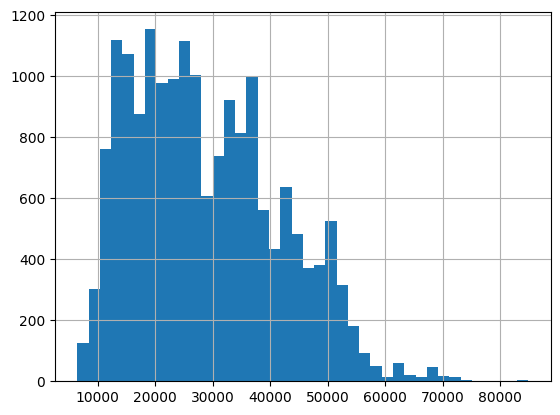

In [226]:
data['airports_nearest'].hist(bins=40);

Ближайший аэропорт для представленных в датасете квартир - Пулково, поэтому расстояние откладывается от квартиры до одной точки для каждой квартиры. Расстояние до аэропорта у большинства рассматриваемых квартир находится в достаточно широком диапазоне: от 10 км до 55 км. Наблюдается небольшая сгруппированность, подобная таковой у распределения расстояния до центра города, однако здесь это слабо выраженно.

##### Расстояние до ближайшего парка

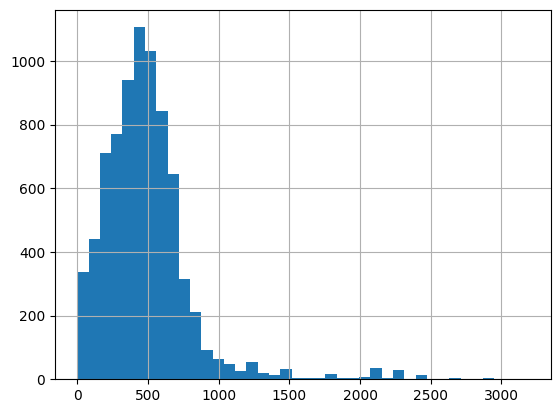

In [227]:
data['parks_nearest'].hist(bins=40);

Основная масса квартир, для которых известно расстояние до ближайшего парка, находится примерно в 500 метрах от ближайшего пакра. Однако вспомним, что более, чем для 60% квартир из датасета картографические данные о парках не указаны. Поэтому нельзя сказать, что для Санкт-Петербурга и всех его пригородов и ближайших посёлков справедливы слова о том, что в среднем, до ближайшего парка всего 500 м.

In [228]:
# посмотрим, для каких населенных пунктов нам известны расстояния
data.dropna(subset=['parks_nearest'])['locality_name'].value_counts()

Санкт-Петербург    7061
Пушкин              205
Петергоф            142
Колпино             133
Кронштадт            87
Сестрорецк           72
Красное Село         47
Павловск             26
Не указано           23
Стрельна             19
Ломоносов            17
Зеленогорск          16
Парголово            10
Name: locality_name, dtype: int64

Как видим, из 306 населенных пунктов, информация нам дана только для 12, среди которых есть также неуказанное местоположение, однако, исходя из выводов выше, можно предположить, что это квартиры, относящиеся непосредственно к Санкт-Петербургу.

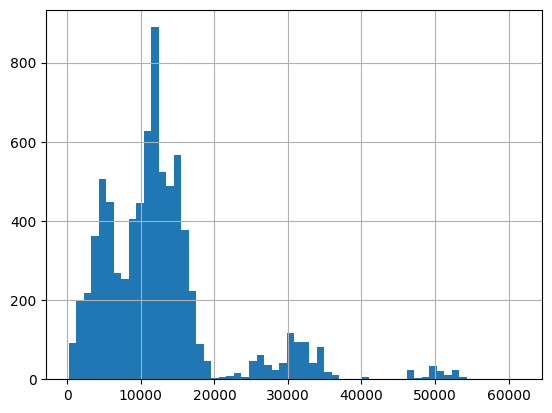

In [229]:
data.dropna(subset=['parks_nearest'])['center_nearest'].hist(bins=60);

Ранее мы выдвигали предположение, что расстояние до ближайших парков плохо рассчитывается программами в том случае, если населенный пункт находится далеко от центра города. 
 
Исходя из гистограммы и списка населенных пунктов выше, можно предположить, что проблема не столько в расстоянии от центра города, сколько в том, насколько рассматриваемый населенный пункт крупный. Однако стоит также узнать, как именно рассчитывется это ближайшее расстояние: по прямой линии от одной точки до другой или же исходя из длины построенного маршрута. Второе кажется более правдоподобным, так как в радиусе длиной 21 км от центра Санкт-Петербурга находятся уже пригороды, а не сам город, но в то же время, на распределении center_nearest выше мы видим Санкт-Петербургские квартиры, отдаленные от центра и на 29-30 км. В этом случае мы приходим к предположению о том, что маршрут в небольших населенных пунктах рассчитывается программами некорректно, а это информация, которую важно сообщить программистам.

##### День и месяц публикации объявления

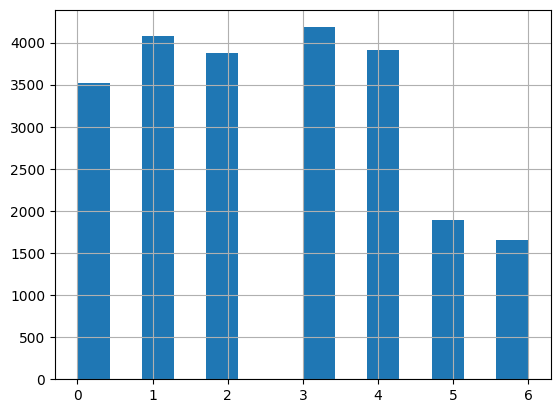

In [230]:
data['weekday'].hist(bins=14);

Из гистограммы можно сделать вывод, что на выходных в 2 раза реже появляются новые предложения о продаже квартир.

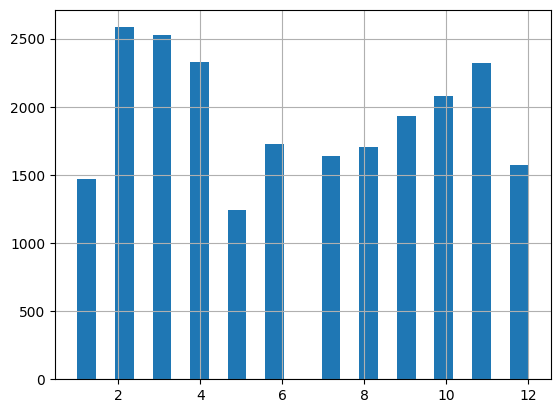

In [231]:
data['month'].hist(bins=24);

Из распределения о появлении объявлений по месяцам видно, что наблюдается некоторая цикличность или сезонность: 
* больше всего новых объявлений появляется в начале года: фев-апрель
* вторая волна приходится на осенние месяцы с максимумом в ноябре

Меньше всего новых объявлений в мае.

#### Скорость продажи квартир

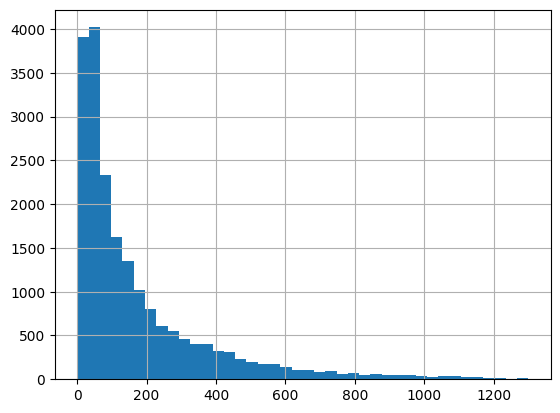

In [232]:
data['days_exposition'].hist(bins=40);

In [233]:
print('Средняя длительность размещения объявления:',
     f"{int(data['days_exposition'].mean())} дней")
print('Медианная длительность размещения объявления:',
     f"{int(data['days_exposition'].median())} дней")

Средняя длительность размещения объявления: 176 дней
Медианная длительность размещения объявления: 95 дней


Зависимость похожа на распределение Пуассона: быстро убывает с ростом длительности. Половина объявлений находится в публикации до 3 месяцев. Для того, чтобы определить, какие значения можно отнести к "очень быстрым", а какие - к "очень долгим", воспользуемся графиком вида ящик с усами.

In [234]:
data['days_exposition'].describe()

count    20037.000000
mean       176.680641
std        210.086537
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1299.000000
Name: days_exposition, dtype: float64

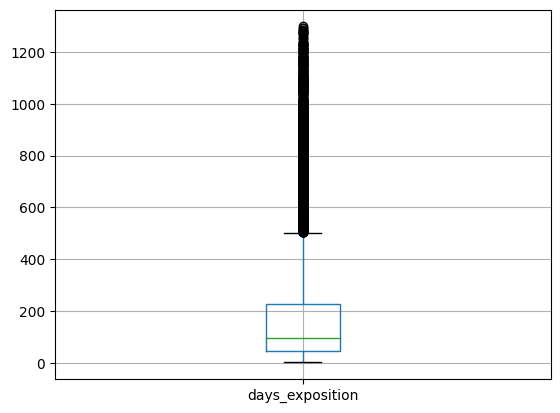

In [235]:
data.boxplot(column='days_exposition');

К необычно долгим можно отнести объявления, выставляющиеся более 1,5 лет. Все "быстрые" значения входят в межквартильный размах, поэтому выбрать какие-то особенности среди них сложно.

In [236]:
data[data['days_exposition'] < 50]['days_exposition'].value_counts().sort_values().head(10)

1.0      1
2.0      3
31.0    66
49.0    69
41.0    75
38.0    77
47.0    77
48.0    77
39.0    80
25.0    82
Name: days_exposition, dtype: int64

Необычайно "быстрыми" можно считать случаи, когда квартира была снята публикации за 1-2 дня. Таких случаев всего 4. Все остальные объявления висели от одного месяца.

In [237]:
data[data['days_exposition'] == 41]['days_exposition'].value_counts().sort_values().head(10)

41.0    75
Name: days_exposition, dtype: int64

#### Факторы, наиболее влияющие на цену квартиры

##### Зависимость от  площади

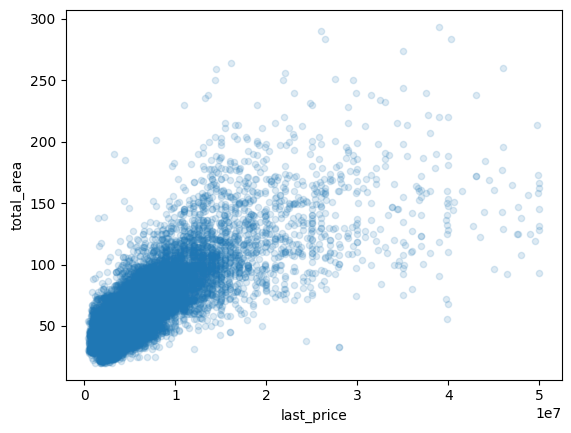

In [238]:
# рассмотрим сначала вклад `total_area`
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.15);

По этому графику можно сделать предположение, что, в целом, существует зависимость цены квартиры от её общей площади, но это справедливо для квартр не дороже 100 млн рублей.

В целом предположение подтверждается: чем больше общая площадь, тем больше цена за эту квартиру. Однако зависимость неидеальная: на цену влияют и другие параметры квартиры.

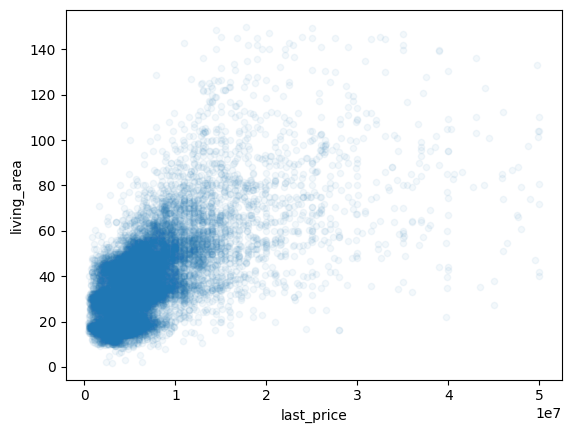

In [239]:
# вклад `living_area`
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.05);

На этот раз точки данных расположены несколько кучнее, что может говорить о большем влиянии именно жилой площади на цену квартиры. Однако снова для квартир ценой более 50 млн рублей зависимость слабеет, а начиная с 100 млн рублей эта тенденция уже не прослеживается.

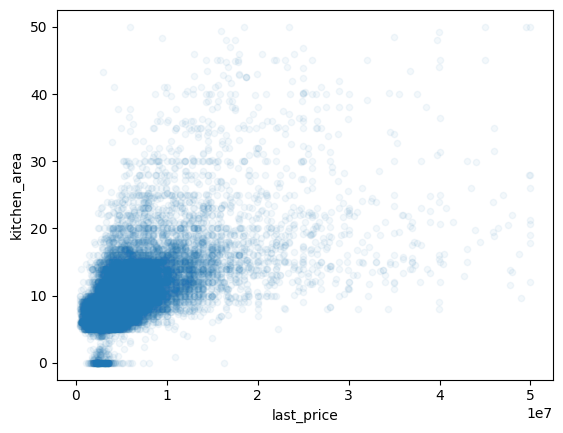

In [240]:
# вклад `kitchen_area`
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.05);

В целом зависимость повторяет предыдущую.

Обратим внимания на угол наклона основной тендеции в наборах данных. Чем меньше наклон (чем менее резок скачок тенденции вверх), тем больше денег требует повышение площади. Построим графики заново, но выровняем вертикальную ось.

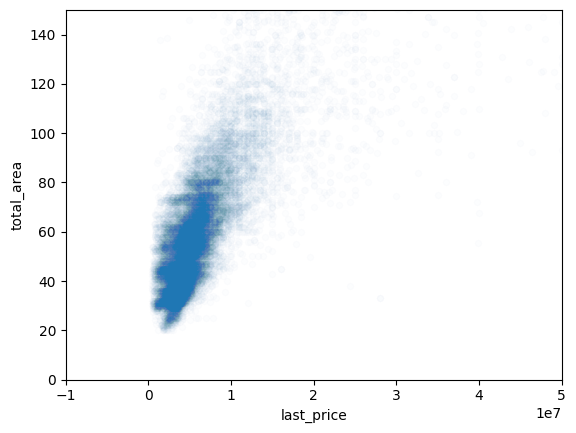

In [241]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.01, ylim=(0, 150), xlim=(-0.1e8, 0.5e8));

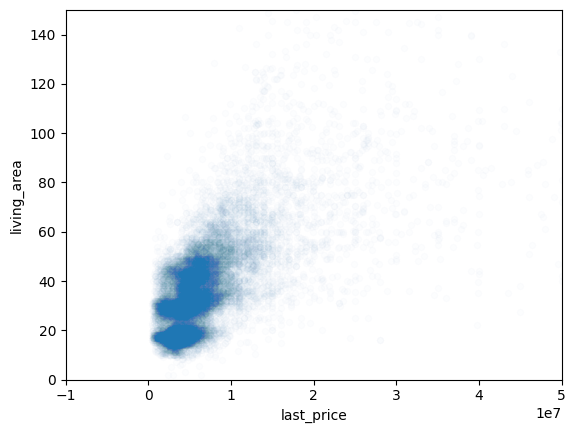

In [242]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.01, ylim=(0, 150), xlim=(-0.1e8, 0.5e8));

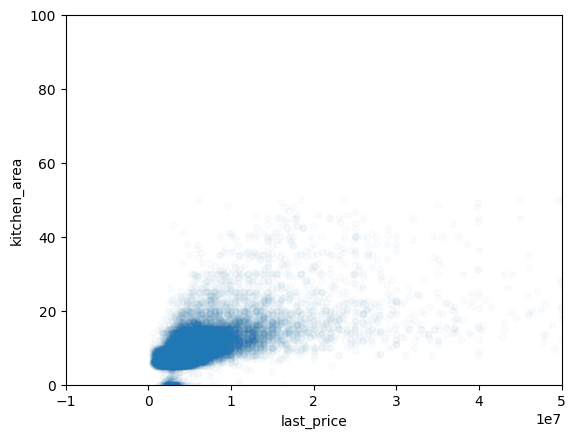

In [243]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.02, ylim=(0, 100), xlim=(-0.1e8, 0.5e8));

Получаем, что цена с ростом общей площади квартиры растет равномерно для квартир ценой до 20 млн рублей. Влияние увеличения жилой площади уже заметно дальше от прямой линии, но это может быть связано с пропусками в данных и их последующим заполнением. Наклон основной тенденции примерно одинаковый, по графика сложно сравнить. Наиболее резкий наклон графика наблюдается для зависимости цены от площади кухни. Получаем, что увеличение кухни на несколько м² ведёт к большему росту цены, чем аналогичные изменения в общей площади или в жилой площади.

In [244]:
print('Корреляция с ценой общей площади квартиры', round(data['last_price'].corr(data['total_area']), 3))
print('Корреляция с ценой жилой площади квартиры', round(data['last_price'].corr(data['living_area']), 3))
print('Корреляция с ценой площади кухни', round(data['last_price'].corr(data['kitchen_area']), 3))

Корреляция с ценой общей площади квартиры 0.772
Корреляция с ценой жилой площади квартиры 0.669
Корреляция с ценой площади кухни 0.593


То, что наблюдалось на графиках, подтверждается и значениями коэффициента Пирсона: большую связь цена квартиры имеет с общей площадью.

##### Зависимость от количества комнат

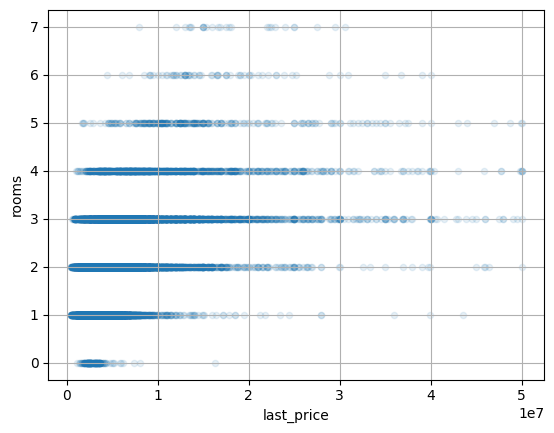

In [245]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1, grid=True);

Из полученного графика можно вынести следующие наблюдения, справедливые для квартир ценой до 200 млн:
- увеличение количества комнат вплоть до 4 не обязательно сказывается на цене квартиры (можно найти за одну и ту же цену и однокомнатную и 4-комнатную квартиру)
- увеличение количества комнат вплоть до 5 увеличивает **максимальную** цену квартиры, однако дальнейший рост числа комнат снижает цену
- начиная с 5 комнат и далее увеличение количества комнат увеличивает **минимальную** цену за такую квартиру

##### Зависимость от типа этажа

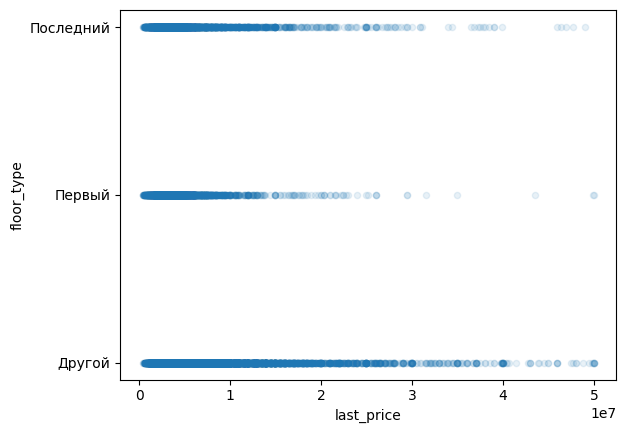

In [246]:
data.plot(x='last_price', y='floor_type', kind='scatter', alpha=0.1);

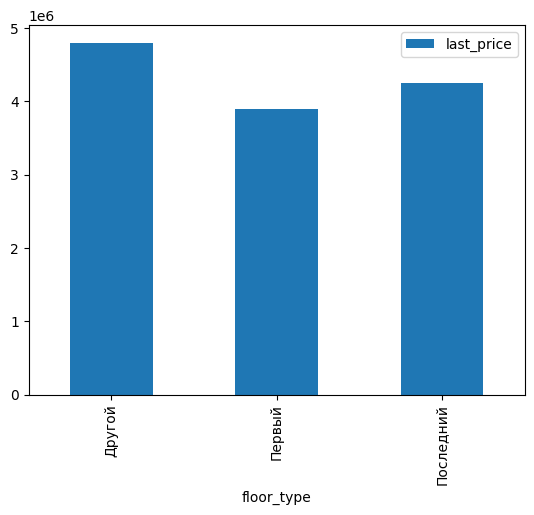

In [247]:
(
    data
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(kind='bar')
);

Из этих двух графиков делаем следующий вывод: в целом дороже стоят квартиры, не находящиеся ни на первом, ни на последнем этаже, на втором месте - квартиры последнего этажа. Максимальная цена квартир, находящихся на первом этаже практически в два раза ниже, чем таковые для других этажей, включая последний.

##### Зависимость от даты размещения

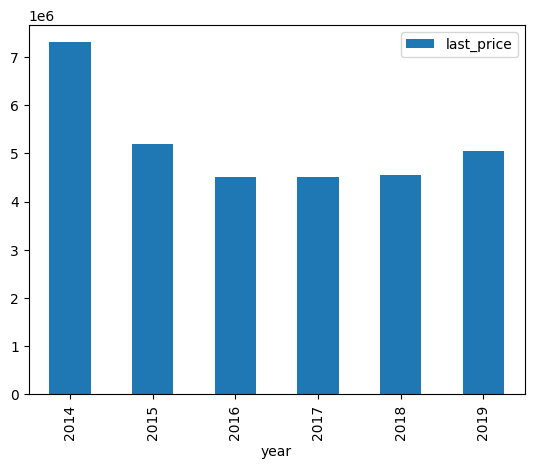

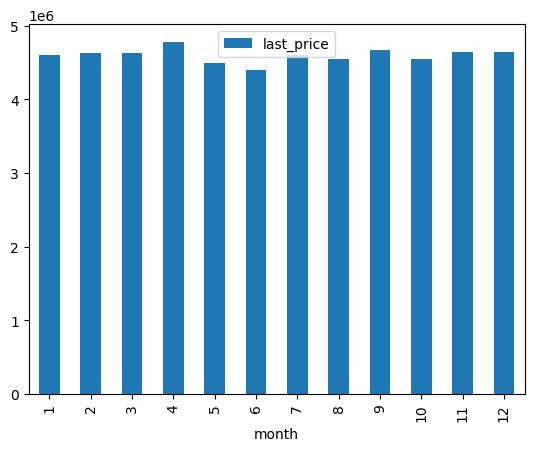

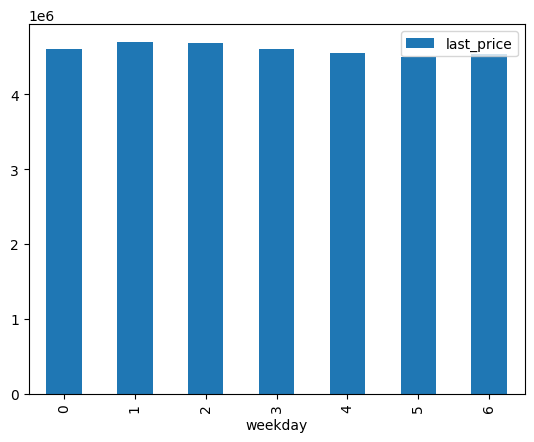

In [248]:
for date in ['year', 'month', 'weekday']:
    (
        data
        .pivot_table(index=date, values='last_price', aggfunc='median')
        .plot(kind='bar')
    )

Квартиры, выставленные в 2014 году, в среднем выставлялись значительно дороже, чем во всех последующих годах вплоть до 2019. Это может объясняться изменением экономической ситуации в 2014 году. Но важно отметить, что, начиная с 2016, наблюдается медленный рост цены.

Влияние дня недели или месяца появления объявления для всего датасета на цену квартиры не обнаруживается.

Посмотрим, какие ещё изменения с течением времени могли привести к изменению цены на квартиры.

In [249]:
year_area = (
    data
    .pivot_table(index='year', values='total_area', aggfunc=['count', 'median'])
)
year_area.columns = ['count_of_obj', 'median_total_area']
year_area

,count_of_obj,median_total_area
year,,
2014,113,75.03
2015,1112,59.70
2016,2725,53.00
2017,8003,51.50
2018,8348,50.25
2019,2820,51.65


Может возникнуть предположение, что в 2014 году было крайне мало квартир на продажу. Однако посмотрим, какие месяца присутствуют в 2014-м году.

In [250]:
# посмотрим на изменение количества публикаций и общей площади с течением лет
(
    data
    .pivot_table(index=['year', 'month'], values='last_price', aggfunc='count')
    .head()
)

last_price
year month            
2014 11             16
     12             97
2015 1              61
     2              50
     3             104

В датасете присутствует информация только о последних двух месяцах 2014 года. С ними и имеет смысл сранивать количество публикаций в разные годы.

In [251]:
year_area = (
    data[(data['month'] == 11) | (data['month'] == 12)]
    .pivot_table(index='year', values='total_area', aggfunc=['count', 'median'])
)

year_area.columns = ['count_of_obj', 'median_total_area']
year_area

,count_of_obj,median_total_area
year,,
2014,113,75.03
2015,295,56.40
2016,254,50.77
2017,2072,51.70
2018,1163,52.50


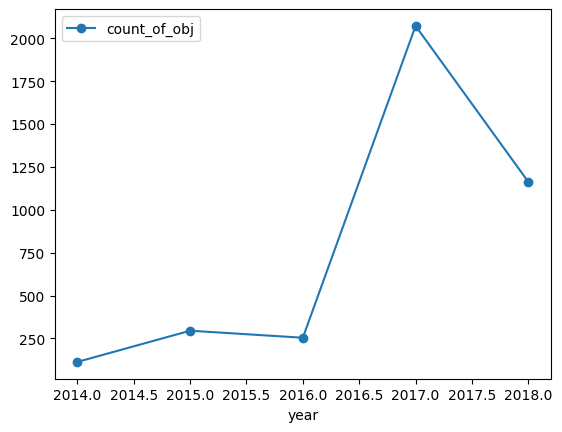

In [252]:
year_area.plot(style='o-', y='count_of_obj');

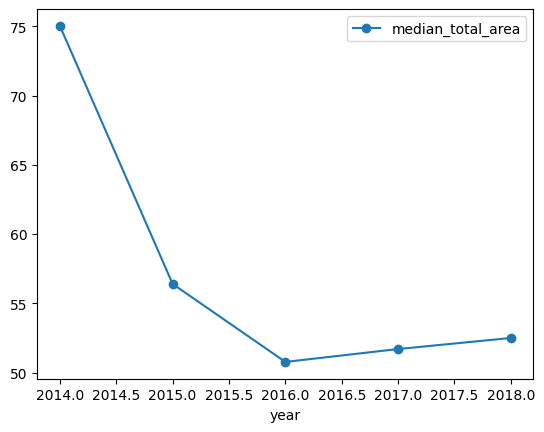

In [253]:
year_area.plot(style='o-', y='median_total_area');

Можно предположить, что в последующие года количество объявлений о продаже квартир увеличилось. При этом в среднем уменьшилась общая площадь продаваемых квартир. Посмотрим, можно ли наблюдать похожую тенденцию для общей площади, если учитывать все месяцы. Кроме того, графики обрываются на 2018 году, так как в датасете присутствуют значения только до мая 2019 года.

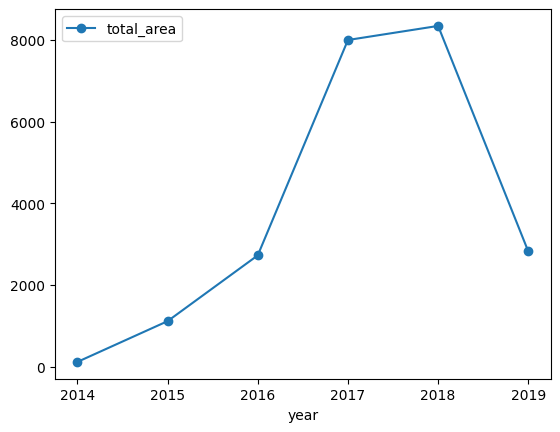

In [254]:
(
    data
    .pivot_table(index='year', values='total_area', aggfunc='count')
    .plot(style='o-')
);

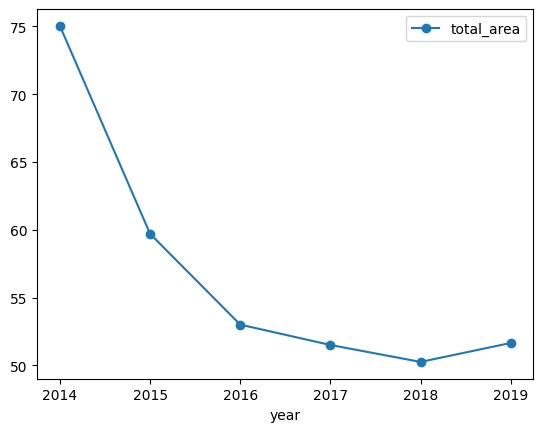

In [255]:
(
    data
    .pivot_table(index='year', values='total_area', aggfunc='median')
    .plot(style='o-')
);

In [256]:
print('На какую долю уменьшилась средняя общая площадь квартиры с 2014 по 2015 год:', 
      round((year_area.loc[2014, 'median_total_area'] - year_area.loc[2015, 'median_total_area']) 
      / year_area.loc[2014, 'median_total_area'], 2))

На какую долю уменьшилась средняя общая площадь квартиры с 2014 по 2015 год: 0.25


Даже с учетом всех месяцев в датасете форма временных зависимостей в целом сохраняется:
- в целом каждый год количество объявлений увеличивается, в 2014 году, вероятно, было выставлено на продажу меньше квартир, чем в последующих годах
- общая площадь квартир в среднем уменьшалась с 2014 по 2018 год, наиболее резкое уменьшение было с 2014 на 2015 год: на 25%

#### Средняя цена одного квадратного метра

In [257]:
# соберем данные о средней цене за один квадратный метр в зависимости от населенного пункта
pivot_per_area = (
    data
    .pivot_table(index='locality_name', values='price_per_area', aggfunc=['count', 'median'])
)
pivot_per_area.columns = ['number_of_obj', 'median_price_per_area']
pivot_per_area['median_price_per_area'] = pivot_per_area['median_price_per_area'].astype('int')

In [258]:
# выведем цену за квадратный метр для 10 населенных пунктов с наибольшим числом объявлений
pivot_per_area.sort_values(by='number_of_obj', ascending=False).head(10)

,number_of_obj,median_price_per_area
locality_name,,
Санкт-Петербург,15289,104411
Мурино,581,86111
Кудрово,465,95348
Шушары,437,76666
Всеволожск,389,65789
Пушкин,358,99865
Колпино,336,74723
Парголово,325,91516
Гатчина,302,67671


Цена за квадратный метр для крупных населенных пунктов находится в диапазоне от 58 тыс. рублей до 105 тыс. рублей. Среди них самый дорогой квадратный метр в Санкт-Петербурге, самый дешёвый - в Выборге

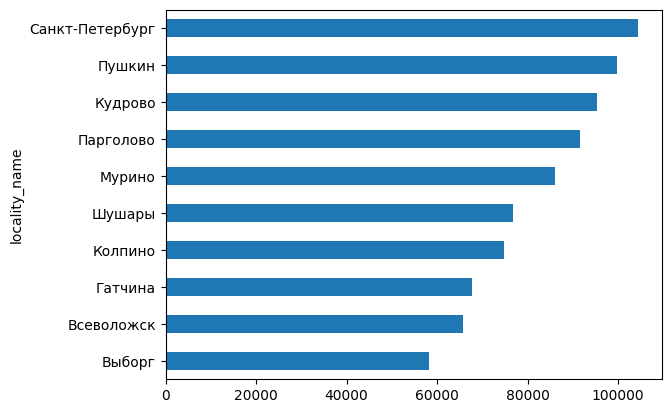

In [259]:
# построим график для наглядности
(
    pivot_per_area
    .sort_values(by='number_of_obj', ascending=False)['median_price_per_area']
    .head(10)
    .sort_values(ascending=True)
    .plot(kind='barh')
);

In [260]:
# найдём, где самая высокая стоимость квадратного метра
pivot_per_area.sort_values(by='median_price_per_area', ascending=False).head(10)

,number_of_obj,median_price_per_area
locality_name,,
Лисий Нос,2,113728
Санкт-Петербург,15289,104411
Зеленогорск,24,101666
Пушкин,358,99865
Сестрорецк,180,99719
Левашово,1,96997
Кудрово,465,95348
Парголово,325,91516
Мистолово,11,90888


Среди всех населенных пунктов, соседних с Санкт-Петербургом, включая последний, самым дорогим остаётся квадратный метр Питера, в тройке лидеров также Зеленогорск и Пушкин.

In [261]:
# найдём, где самая низкая стоимость квадратного метра
pivot_per_area.sort_values(by='median_price_per_area', ascending=False).tail(10)

,number_of_obj,median_price_per_area
locality_name,,
Житково,2,14956
Ям-Тесово,2,13711
Сижно,1,13709
Выскатка,1,13207
Тёсово-4,1,12931
Малая Романовка,1,12724
Совхозный,2,12629
Вахнова Кара,1,11688
Свирь,2,11481


Самая низкая цена в небольших и довольно отдаленных от Петербурга насенленных пунктах.

#### Влияние расстояния до центра на цену квадратного метра квартир Санкт-Петербурга

In [262]:
center_km_piter = (
    data
    .query("locality_name == 'Санкт-Петербург'")
    .pivot_table(index='center_km', values='price_per_area', aggfunc='median')
)
center_km_piter.columns = ['p_per_area']
center_km_piter.head()

,p_per_area
center_km,
0.0,138536.993745
1.0,125565.610860
2.0,117391.304348
3.0,108055.555556
4.0,117030.389047


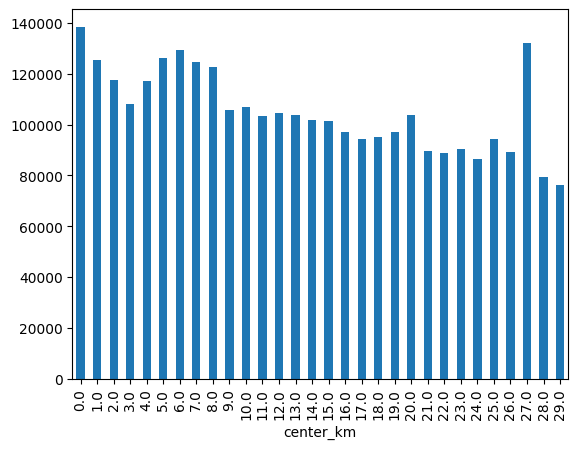

In [263]:
# посмотрим, как цена одного квадратного метра зависит от расстояния квартиры до центра
center_km_piter['p_per_area'].plot(kind='bar');

Общая тенденция говорит о снижении цены квадратного метра с ростом расстояния до центра города. Однако в зависимости наблюдаются некоторые особенности. Первая - очень высокая цена квадратного метра на расстоянии 27 км от города.

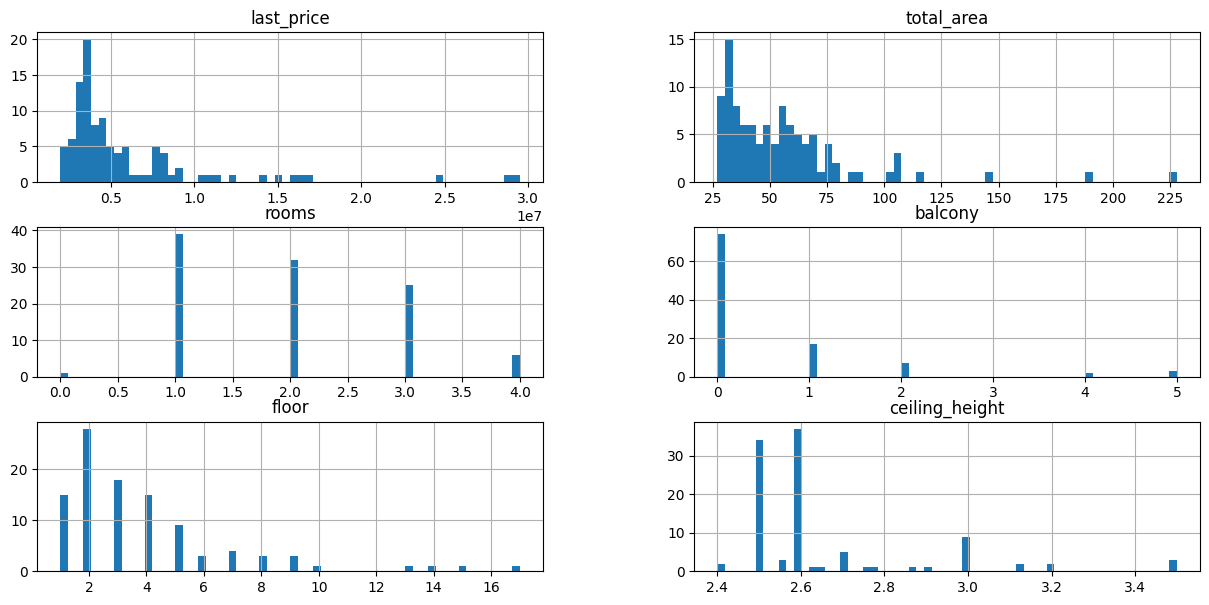

In [264]:
data[data['center_km'] == 27][some_param].hist(bins=60, figsize=(15, 7));

Никаких особенностей в большинстве парамметров квартир не наблюдается. Посмотрим, где большинство квартир расположены.

In [265]:
data[data['center_km'] == 27]['locality_name'].value_counts()

Пушкин             68
Металлострой       30
Санкт-Петербург     2
Петро-Славянка      1
Александровская     1
Красное Село        1
Name: locality_name, dtype: int64

Больше половины квартир расположены в Пушкине. Этот населенный пункт занимает второе место по цене квадратного метра, поэтому вклад этот квартир даёт всплеск на распределении.

Вторая особенность - резкий спад на 3 км и рост к 5-6 км цены квадратного метра. Возможно, что какие-то особенности квартир в соответствующих районах влияют на падение / рост цены квадратного метра.

In [266]:
center_type_floor_3km = (
    data[data['center_km'] == 3]
    .pivot_table(index='floor_type', values='total_area', aggfunc='count')
)
center_type_floor_3km.columns = ['count_obj']

In [267]:
def ratio_type_floor(df):
    count = sum(df['count_obj'])
    a = []
    for i in df.index:
        ratio = round(df.loc[i, 'count_obj'] / count, 2)
        a.append(ratio)
    return a

In [268]:
center_type_floor_3km['ratio'] = ratio_type_floor(center_type_floor_3km)

In [269]:
center_type_floor_3km

,count_obj,ratio
floor_type,,
Другой,206,0.61
Первый,54,0.16
Последний,75,0.22


In [270]:
center_type_floor_5km = (
    data[data['center_km'] == 5]
    .pivot_table(index='floor_type', values='total_area', aggfunc='count')
)
center_type_floor_5km.columns = ['count_obj']

In [271]:
center_type_floor_5km['ratio'] = ratio_type_floor(center_type_floor_5km)
center_type_floor_5km

,count_obj,ratio
floor_type,,
Другой,653,0.76
Первый,77,0.09
Последний,127,0.15


In [272]:
center_type_floor = (
    data[data['center_km'] != 27]
    .pivot_table(index='floor_type', values='total_area', aggfunc='count')
)
center_type_floor.columns = ['count_obj']

In [273]:
center_type_floor['ratio'] = ratio_type_floor(center_type_floor)
center_type_floor

,count_obj,ratio
floor_type,,
Другой,17004,0.74
Первый,2837,0.12
Последний,3177,0.14


In [274]:
center_type_floor = center_type_floor.join(center_type_floor_3km, rsuffix='_3km')
center_type_floor = center_type_floor.join(center_type_floor_5km, rsuffix='_5km')
center_type_floor

,count_obj,ratio,count_obj_3km,ratio_3km,count_obj_5km,ratio_5km
floor_type,,,,,,
Другой,17004,0.74,206,0.61,653,0.76
Первый,2837,0.12,54,0.16,77,0.09
Последний,3177,0.14,75,0.22,127,0.15


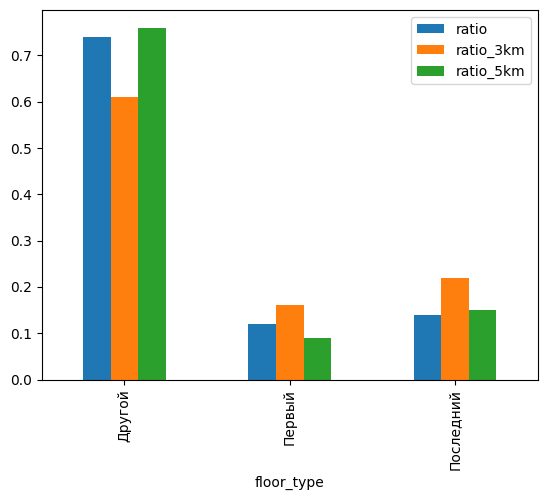

In [275]:
center_type_floor.plot(y=['ratio', 'ratio_3km', 'ratio_5km'], kind='bar');

Как видим, на отдалении от центра в 3 км больше квартир, расположенных на первом и последних этажах. Из предыдущих выводов известно, что цена квартир на этих этажах ниже, чем если квартиры расположены на промежуточных. Это сказывается и на медианной цене квадратного метра.

По той же причине выше расположена цена квадратного метра для квартир, отдаленных на 5 км - здесь больше, чем в среднем, квартир на промежуточных этажах и заметно меньше квартир на первом этаже.

### Общий вывод

Общие особенности рынка недвижимости:

* В основном в датасете представлены квартиры с общей площадью около 45 м², жилая площадь - от 20 м² до 40 м², площадь кухни - 5-12 м².
* Большая часть квартир продаётся в диапазоне от 2,5 до 6 млн рублей
* В основном продаются квартиры с 1-3 комнатами. Студии (квартир с 0 комнат) продают реже, чем 4-комнатные или 5-комнатные квартиры, но примерно столько же, сколько и 6-комнатные квартиры
* Больше всего квартир покупают на этажах, которые не являются ни первыми, ни последними
* На выходных в 2 раза реже появляются новые предложения о продаже квартир
* Больше всего новых объявлений появляется в начале года: фев-апрель
* Вторая волна новых объявлений приходится на осенние месяцы с максимумом в ноябре
* В основном квартиры находятся в публикации от 1 до 3 месяцев

Параметры, влияющие на цену:

* Для квартир ценой до 20 млн рублей существует зависимость цены от общей площади квартиры / жилой площади и площади кухни, при этом **увеличение площади кухни сильнее влияет на цену**
* Минимальная цена квартиры не сильно зависит от количества комнат, если рассматривать квартиры до 4-х комнат. Максимальная цена растёт с увеличеснием количества комнат до 5, но далее эта зависимость не продолжается
* В целом **дороже стоят квартиры, не находящиеся ни на первом, ни на последнем этаже**
* Квартиры в 2014 году были значительно дороже, чем в последующие годы
* **Дороже всего квадратный метр стоит в Санкт-Петербурге, Зеленогорске и Пушкине**
* **С ростом расстояния квартиры от центра города цена квадратного метра квартиры падает**, однако из общей зависимости выпадает Пушкин (находится на расстоянии 27 км от центра, но имеет самую дорогую после Санкт-Петербурга цену квадратного метра)